# Анализ рынка недвижимости: исследование объявлений о продаже квартир

## 1. Описание проекта

### 1.1. Цель
Выполнить исследовательский анализ данных и выявить закономерности, определяющие рыночную стоимость объектов недвижимости. Это в свою очередь позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 


### 1.2. План работы
1. Изучить общую информацию о данных.
2. Выполнить предобработку данных.
   * Найти и изучить пропущенные значения в столбцах.
   * Изменить типы данных в столбцах при необходимости. 
   * Устранить неявные дубликаты.
   * Найти и устранить аномалии в данных.
3. Добавить в таблицу новые столбцы, которые понадобятся для анализа.
4. Провести исследовательский анализ данных.
   * Изучить параметры объектов недвижимости.
   * Изучить, как быстро продавались квартиры.
   * Изучить зависимость цены объекта недвижимости от различных параметров.
   * Посчитать цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений и выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра.
   * Определить как меняется стоимость квартир в зависимости от расстояния до центра Санкт-Петербурга.

### 1.3. Описание данных
В распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. По каждой квартире на продажу доступны два вида данных: первые вписаны пользователем, вторые — получены автоматически на основе картографических данных, например, расстояние до центра города, аэропорта и т.п. 

Описание столбцов датафрейма:
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м);
* balcony — число балконов;
* ceiling_height — высота потолков (м);
* cityCenters_nearest — расстояние до центра города Санкт-Петербург (м);
* days_exposition — сколько дней было размещено объявление (от публикации до снятия);
* first_day_exposition — дата публикации;
* floor — этаж
* floors_total — всего этажей в доме;
* is_apartment — апартаменты (булев тип);
* kitchen_area — площадь кухни в квадратных метрах (м²);
* last_price — цена на момент снятия с публикации;
* living_area — жилая площадь в квадратных метрах (м²);
* locality_name — название населённого пункта;
* open_plan — свободная планировка (булев тип);
* parks_around3000 — число парков в радиусе 3 км;
* parks_nearest — расстояние до ближайшего парка (м);
* ponds_around3000 — число водоёмов в радиусе 3 км;
* ponds_nearest — расстояние до ближайшего водоёма (м);
* rooms — число комнат;
* studio — квартира-студия (булев тип);
* total_area — общая площадь квартиры в квадратных метрах (м²);
* total_images — число фотографий квартиры в объявлении.

## 2. Знакомство с данными

Импортируем необходимые библиотеки и считаем данные из файла.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('real_estate_data.csv', sep='\t')

Изучим данные. Для этого выведем первые 10 строк датафрейма, изучим информацию о нём, вызвав метод `info`, и построим гистограммы для числовых столбцов.

In [3]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

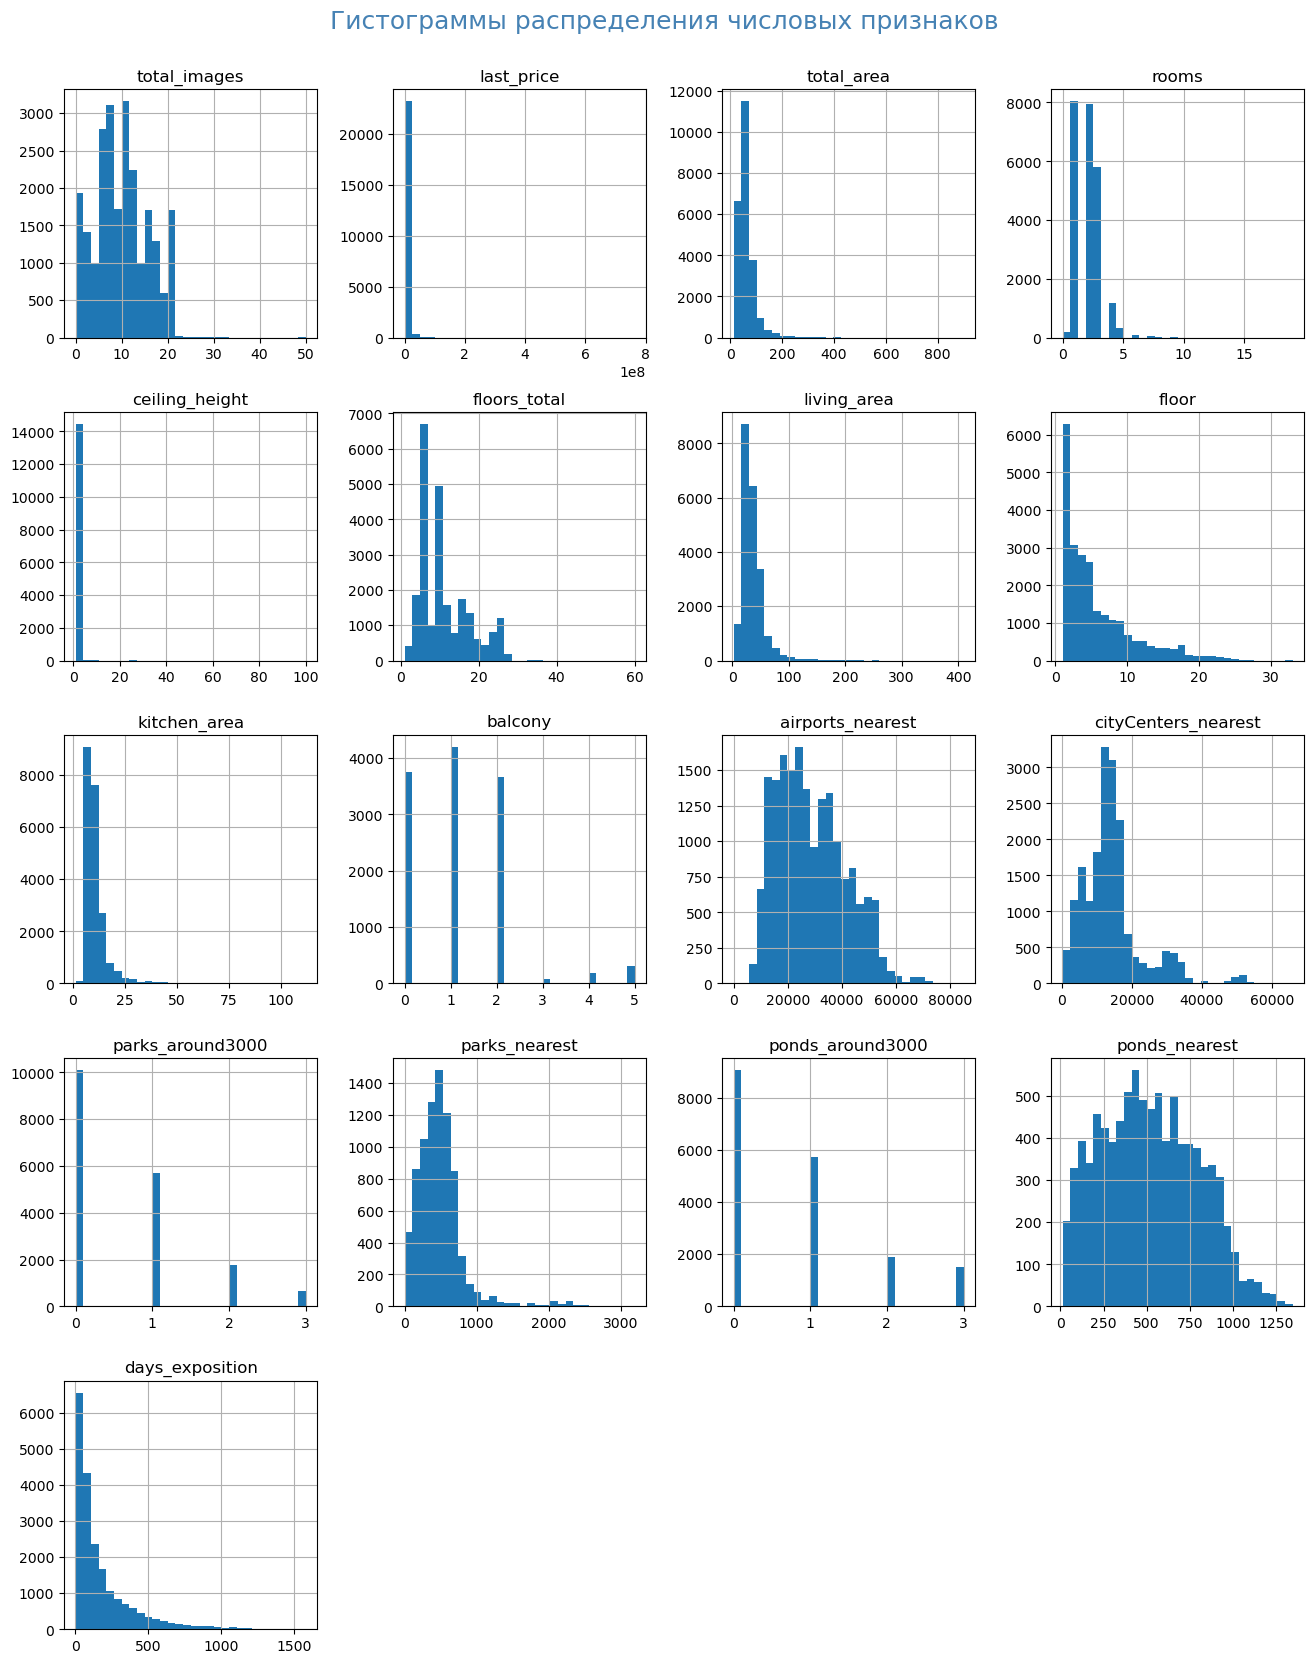

In [5]:
df.hist(figsize=(16, 20), bins=30)
plt.suptitle('Гистограммы распределения числовых признаков', y=0.92, fontsize=18, color='SteelBlue');

**Выводы.**
* В 14 столбцах из 22 присутствуют пропущенные значения.
* Типы данных некоторых столбцов не соответствуют их содержанию.
* В некоторых столбцах присутствуют выбросы: большая часть значений таких столбов сосредоточена на гистограмме слева, а справа они имеют длинные "хвосты". 

Далее мы подробнее рассмотрим данные и выполним их предобработку, включая устранение пропущенных значений, изменение типов данных и удаление выбросов.

## 2. Предобработка данных

### 2.1. Поиск и устранение редких и выбивающихся значений

Найти аномальные значения помогут гистограммы построенные на предыдущем этапе и расчёт параметров объектов недвижимости на разных квантилях. 
На гистограммах, построенных по столбцам `last_price`, `total_area`, `living_area`, `kitchen_area`, `rooms`, `ceiling_height`, `days_exposition`, `floors_total`, `floor`, видны длинные "хвосты". Причём на многих гистограммах присутствует высокий пик в начале, после которого значений на диаграммах практически не видно, что говорит об их малочисленности. Это является признаком наличия выбросов в диапазоне высоких значений этих столбцов. Наличие выбросов в низких диапазонах этих столбцов по этим гистограммам не увидеть, так как их масштаб очень маленький; для определения наличия таких выбросов используем квантили. Найдем для столбцов `last_price`, `total_area`, `living_area`, `kitchen_area`, `rooms`, `ceiling_height` и `days_exposition`, `floors_total` и `floor` минимальные и максимальные значения и процентили соответствующие 0,12%, 0,5%, 1%, 50%, 99%, 99,5% 99,88%. 

In [6]:
# выбираем размах в 0,9976 квантилей; квантили 0 и 1 соостветствуют минимальному и максимальному значению столбца
(
    df[['rooms', 'ceiling_height', 'last_price', 'total_area', 'living_area', 
        'kitchen_area', 'floors_total', 'floor', 'days_exposition']]
    .quantile([0, 0.0012, .005, 0.01, .5, .99, .995, .9988, 1]) 
    .style.format("{:,.2f}")
)

,rooms,ceiling_height,last_price,total_area,living_area,kitchen_area,floors_total,floor,days_exposition
0.000000,0.00,1.00,"12,190.00",12.00,2.00,1.30,1.00,1.00,1.00
0.001200,0.00,2.30,"562,188.00",20.00,10.00,3.77,2.00,1.00,3.00
0.005000,0.00,2.50,"800,000.00",23.50,11.20,5.00,2.00,1.00,3.00
0.010000,1.00,2.50,"1,000,000.00",25.20,13.00,5.00,2.00,1.00,4.00
0.500000,2.00,2.65,"4,650,000.00",52.00,30.00,9.10,9.00,4.00,95.00
0.990000,5.00,3.83,"36,000,000.00",197.21,120.00,35.09,26.00,23.00,"1,068.66"
0.995000,6.00,4.10,"54,510,000.00",248.85,154.02,42.36,27.00,24.00,"1,179.83"
0.998800,8.00,25.00,"124,772,448.00",380.00,219.69,60.00,35.00,26.00,"1,369.90"
1.000000,19.00,100.00,"763,000,000.00",900.00,409.70,112.00,60.00,33.00,"1,580.00"


**Выводы.**
* В столбцах `rooms` и `floors_total` присутствуют выбросы в диапазоне высоких значений, это видно по наличию большой разницы между 99,88% процентилем и максимальным значением этого столбца.
* В столбце `ceiling_height` присутствуют аномалии как в низких, так и в высоких значениях: логически понятно, что нет квартир с потолками высотой 1 или 100 метров.
* В столбце `last_price`, `living_area` присутствуют выбросы в диапазонах и низких и высоких значений: минимальное значение и 0,12% процентиль, а также 99,88% процентиль и максимальное значение этого столбца сильно отличаются друг от друга.
* В столбцах `total_area`, `kitchen_area` явно присутствуют выбросы с большими значениями: 99,88% процентиль и максимальные значения этих столбцов сильно отличаются друг от друга. Наличие выбросов в низких значениях неочевидно, поэтому далее рассмотрим эти случаи подробнее.
* Судя по таблице, в столбце `floor` нет выбросов, однако, если мы будем удалять выбросы из столбца `floors_total`, то нам, возможно, придётся вернуться к рассмотрению этого столбца, так как они связаны: этажа, на котором расположена квартира, не может быть больше, чем количество этажей в доме.
* Судя по таблице, в столбце нет выбросов `days_exposition`, однако, на всякий случай мы рассмотрим его подробнее, чтобы в этом убедиться или опровергнуть.

#### 2.1.1. Аномалии в столбце `last_price`

Видим, что в столбце `last_price` минимальное значение очень маленькое, всего 12 тыс, и кажется нереальным даже для недвижимости в селе или деревне, а разница между квантилями, соответствующими 99,5% 99,88% и 100% чрезмерно большая. Рассмотрим в увеличенном масштабе начало и "хвост" гистограммы столбца `last_price`.

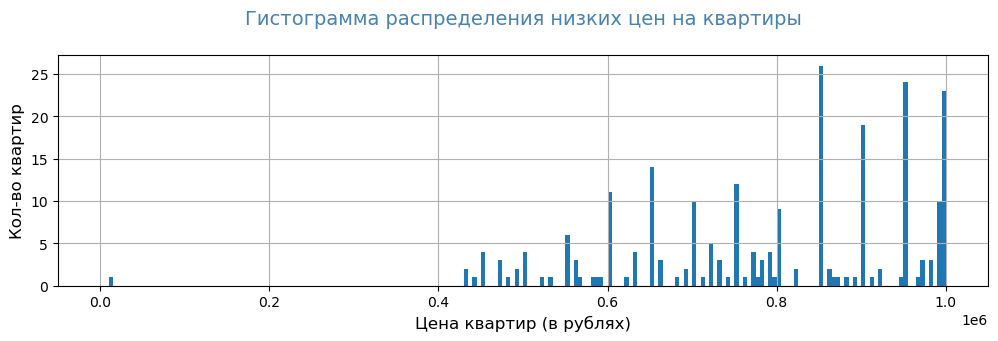

In [7]:
ax = df['last_price'].hist(bins=200, figsize=(12,3), range=(0, 1_000_000))
ax.set_title('Гистограмма распределения низких цен на квартиры\n', fontsize=14, color ='SteelBlue')
ax.set_xlabel('Цена квартир (в рублях)', fontsize=12)
ax.set_ylabel('Кол-во квартир', fontsize=12);

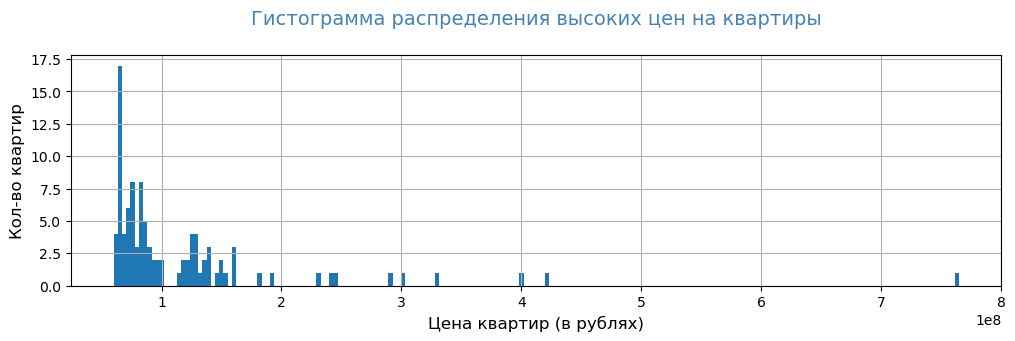

In [8]:
ax = df['last_price'].hist(bins=200, figsize=(12,3), range=(60_000_000, 765_000_000))
ax.set_title('Гистограмма распределения высоких цен на квартиры\n', fontsize=14, color ='SteelBlue')
ax.set_xlabel('Цена квартир (в рублях)', fontsize=12)
ax.set_ylabel('Кол-во квартир', fontsize=12);

Видим, что значения меньше 800 тыс. и больше 60 млн очень редкие, поэтому будем считать их аномалиями и удалим соответствующие им строки из датафрейма. Однако удалять данные из датафрейма мы будем только после того, как исследуем аномалии во всех столбцах, иначе мы можем не увидеть часть данных, анализируя значения в других столбцах.

#### 2.1.2. Аномалии в столбце `total_area`

Рассмотрим в увеличенном масштабе начало и "хвост" гистограммы столбца `total_area`.

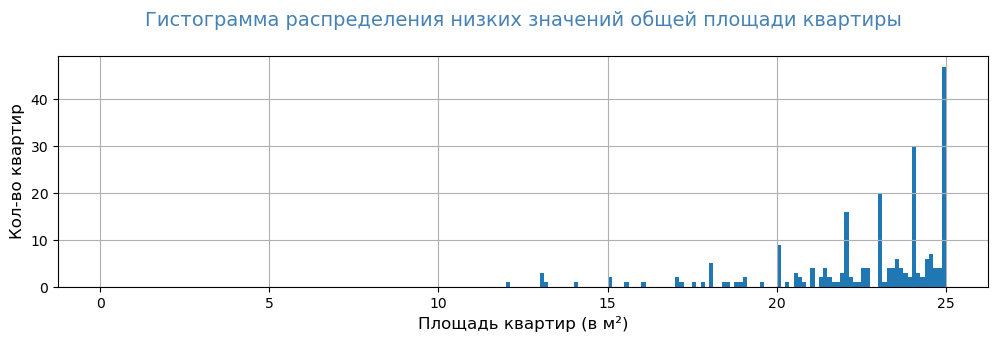

In [9]:
ax = df['total_area'].hist(bins=200, figsize=(12,3), range=(0, 25))
ax.set_title('Гистограмма распределения низких значений общей площади квартиры\n', fontsize=14, color ='SteelBlue')
ax.set_xlabel('Площадь квартир (в м²)', fontsize=12)
ax.set_ylabel('Кол-во квартир', fontsize=12);

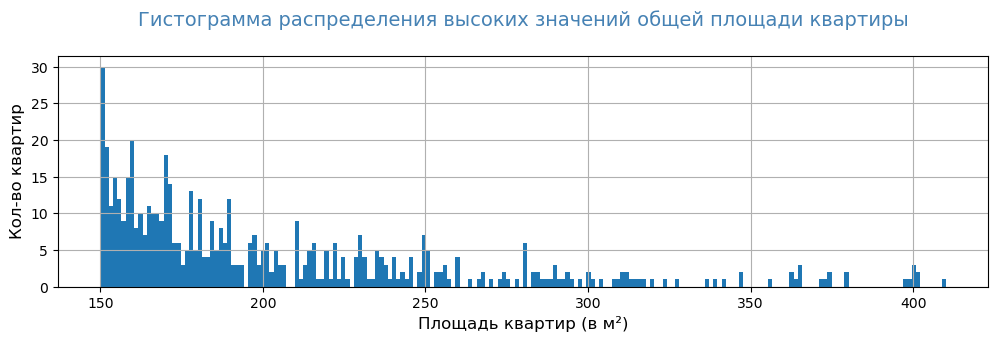

In [10]:
ax = df['total_area'].hist(bins=200, figsize=(12,3), range=(150, 410))
ax.set_title('Гистограмма распределения высоких значений общей площади квартиры\n', fontsize=14, color ='SteelBlue')
ax.set_xlabel('Площадь квартир (в м²)', fontsize=12)
ax.set_ylabel('Кол-во квартир', fontsize=12);

В нашем датафрейме квартиры с общей площадью менее 20 метров и более 250 очень редкие, поэтому после исследования аномалий во всех столбцах удалим соответствующие им строки из датафрейма.

#### 2.1.3. Аномалии в столбце `living_area`

Рассмотрим в увеличенном масштабе начало и "хвост" гистограммы столбца `living_area`.

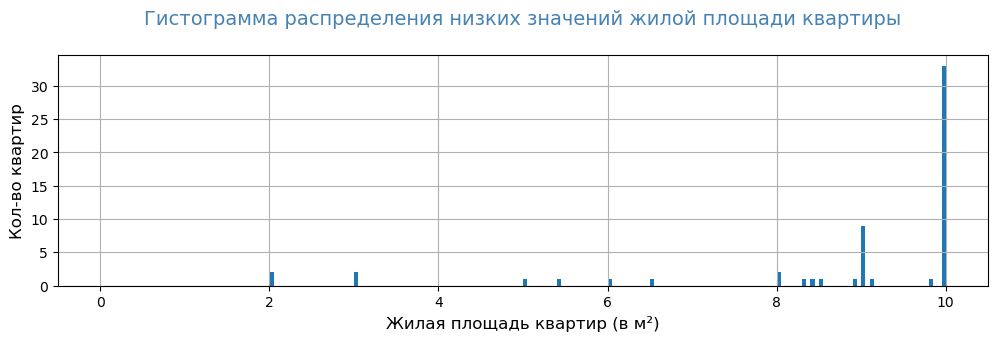

In [11]:
ax = df['living_area'].hist(bins=200, figsize=(12,3), range=(0, 10))
ax.set_title('Гистограмма распределения низких значений жилой площади квартиры\n', fontsize=14, color ='SteelBlue')
ax.set_xlabel('Жилая площадь квартир (в м²)', fontsize=12)
ax.set_ylabel('Кол-во квартир', fontsize=12);

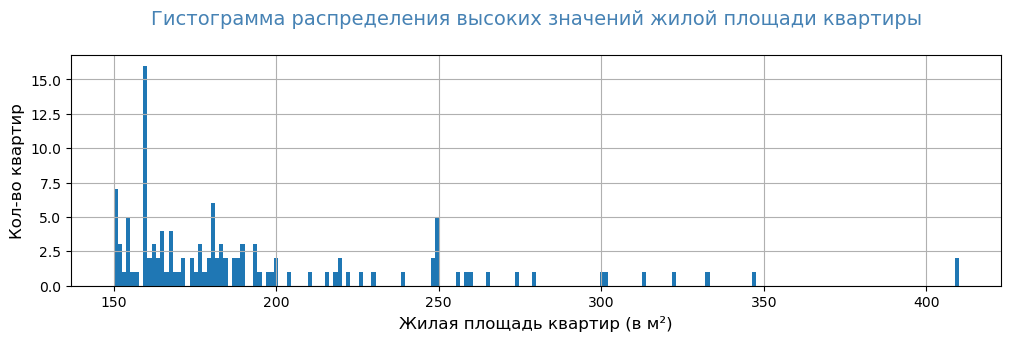

In [12]:
ax = df['living_area'].hist(bins=200, figsize=(12,3), range=(150, 410))
ax.set_title('Гистограмма распределения высоких значений жилой площади квартиры\n', fontsize=14, color ='SteelBlue')
ax.set_xlabel('Жилая площадь квартир (в м²)', fontsize=12)
ax.set_ylabel('Кол-во квартир', fontsize=12);

Квартиры с жилой площадью менее 10 метров и более 160 практически не встречаются в датафрейме, поэтому удалим их после исследования аномалий во всех столбцах.

#### 2.1.4. Аномалии в столбце `kitchen_area`

Рассмотрим в увеличенном масштабе начало и "хвост" гистограммы столбца `kitchen_area`.

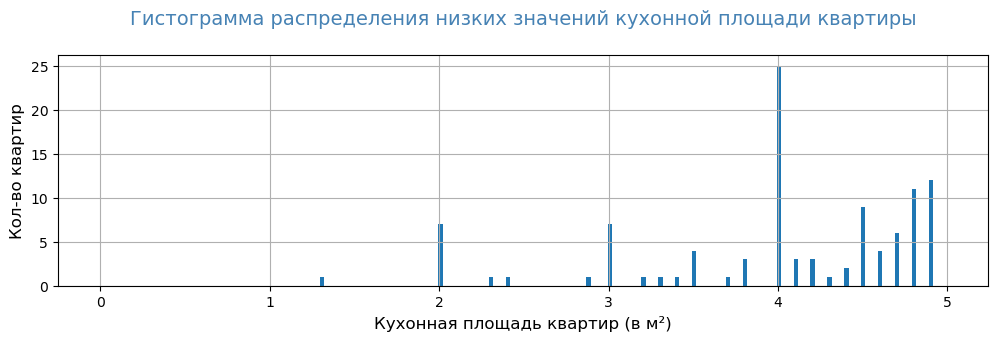

In [13]:
ax = df['kitchen_area'].hist(bins=200, figsize=(12,3), range=(0, 4.99))
ax.set_title('Гистограмма распределения низких значений кухонной площади квартиры\n', fontsize=14, color ='SteelBlue')
ax.set_xlabel('Кухонная площадь квартир (в м²)', fontsize=12)
ax.set_ylabel('Кол-во квартир', fontsize=12);

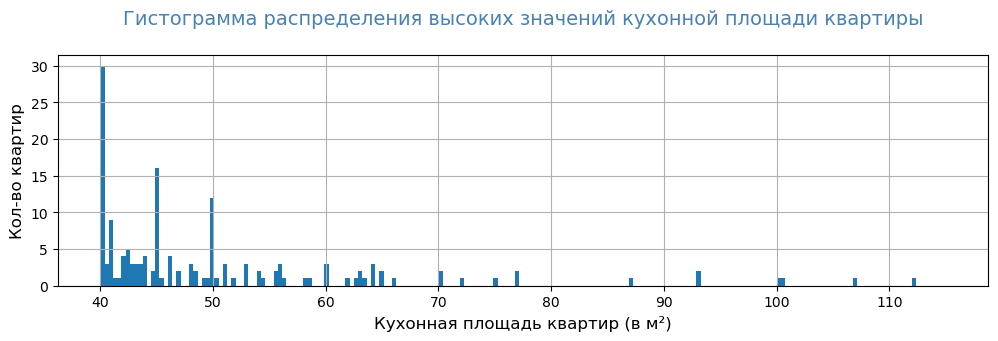

In [14]:
ax = df['kitchen_area'].hist(bins=200, figsize=(12,3), range=(40, 115))
ax.set_title('Гистограмма распределения высоких значений кухонной площади квартиры\n', fontsize=14, color ='SteelBlue')
ax.set_xlabel('Кухонная площадь квартир (в м²)', fontsize=12)
ax.set_ylabel('Кол-во квартир', fontsize=12);

Квартиры с кухонной площадью менее 4 метров и более 40 практически не встречаются в датафрейме, поэтому удалим их после исследования аномалий во всех столбцах.

#### 2.1.5. Аномалии в столбцах `floors_total` и `floor`

В столбце `floors_total` также присутствуют аномальные значения, однако, выявлять мы их будем по-другому. Согласно информации, взятой из интернета, в Санкт-Петербурге нет жилых домов более чем с 37 этажами. Постройки с большим количеством этажей ещё менее вероятны в Ленинградской области. Поэтому после исследования аномалий во всех столбцах удалим из датафрейма строки, где количество этажей в доме больше 37. 

Также проверим, что нет таких квартир, этаж которых будет больше, чем количество этажей в доме, иначе это аномалия.

In [15]:
print('Количество квартир, этаж которых будет больше, чем количество этажей в доме:', 
      df[df['floor'] > df['floors_total']].shape[0])

Количество квартир, этаж которых будет больше, чем количество этажей в доме: 0


#### 2.1.6. Аномалии в столбце `rooms`

Построим "хвост" гистограмы столбца `rooms`. 

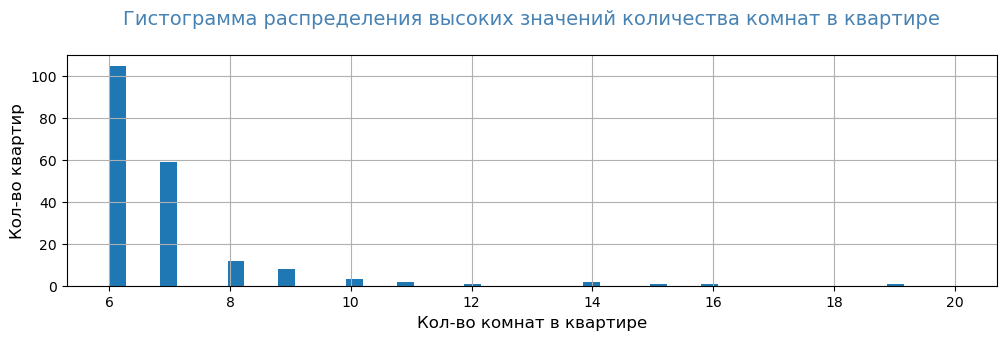

In [16]:
ax = df['rooms'].hist(bins= 50, figsize=(12,3), range=(6, 20))
ax.set_title('Гистограмма распределения высоких значений количества комнат в квартире\n', fontsize=14, color ='SteelBlue')
ax.set_xlabel('Кол-во комнат в квартире', fontsize=12)
ax.set_ylabel('Кол-во квартир', fontsize=12);

Квартиры с количеством комнат больше 7 практически не встречаются в нашем датафрейме, поэтому будем считать их аномалиями. 

Вспомним, что ранее в таблице, в которой были указаны значения квантилей этого столбца, мы видели, что в датафрейме присутствуют квартиры, у которых количество комнат равно 0. Это не выбросы, если это квартиры-студии, однако, в противном случае квартиры с количеством комнат, равным 0, можно считать аномалиями. Проверим, есть ли в датафреймы такие квартиры.

In [17]:
print('Количество квартир без комнат, которые не являются студиями:', df[(df['rooms'] == 0) & (df['studio'] == False)].shape[0])

Количество квартир без комнат, которые не являются студиями: 59


Видим, что в датафрейме таких нашлось 59 таких квартир, будем считать их аномалиями и удалим из датафрейма после исследования аномалий во всех столбцах.

#### 2.1.7. Аномалии в столбце `days_exposition`

Рассмотрим в увеличенном масштабе начало и "хвост" гистограммы столбца `days_exposition`.

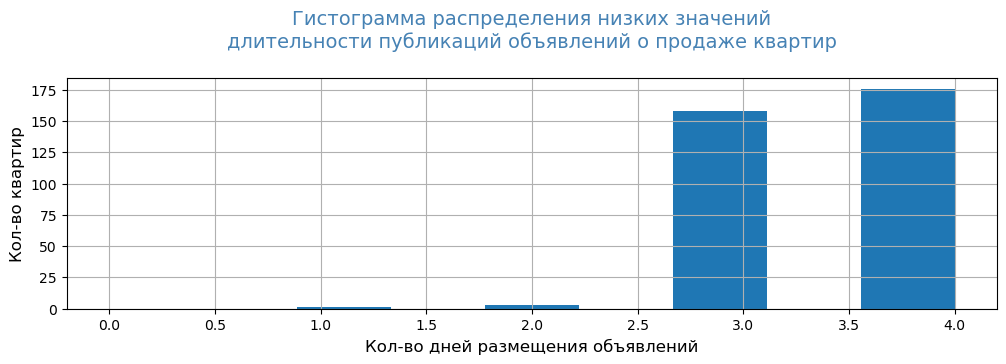

In [18]:
ax = df['days_exposition'].hist(bins=9, figsize=(12, 3), range=(0, 4))
ax.set_title('Гистограмма распределения низких значений\nдлительности публикаций объявлений о продаже квартир\n', 
             fontsize=14, color ='SteelBlue')
ax.set_xlabel('Кол-во дней размещения объявлений', fontsize=12)
ax.set_ylabel('Кол-во квартир', fontsize=12);

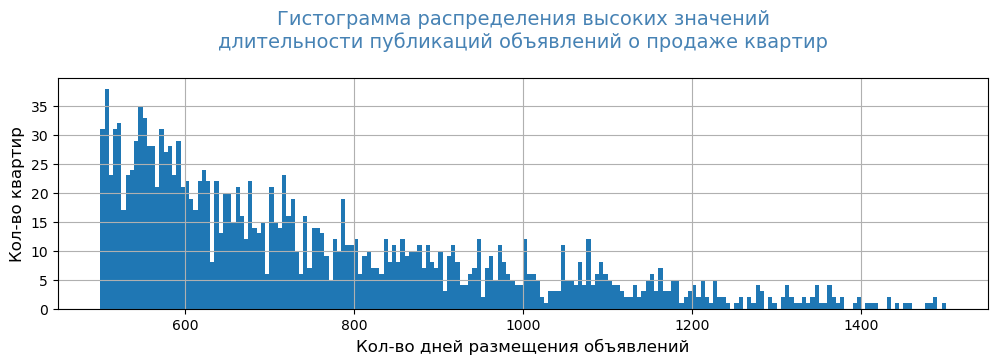

In [19]:
ax = df['days_exposition'].hist(bins=200, figsize=(12,3), range=(500, 1500))
ax.set_title('Гистограмма распределения высоких значений\nдлительности публикаций объявлений о продаже квартир\n', 
             fontsize=14, color ='SteelBlue')
ax.set_xlabel('Кол-во дней размещения объявлений', fontsize=12)
ax.set_ylabel('Кол-во квартир', fontsize=12);

В начале гистограммы наблюдаются несколько выбросов, когда продаже квартиры происходила за 1 и 2 дня. Такие значения можно считать аномальными, поэтому удалим их из датафрейма после исследования аномалий во всех столбцах. 

А вот в "хвосте" гистограммы аномальных значений не наблюдается: частота встречаемости событий убывает постепенно, поэтому нельзя сказать, что более долгие продажи являются нехарактерными значениями (выбросами) в нашем датафрейме.

#### 2.1.8. Аномалии в столбце `ceiling_height`

Рассмотрим значения в столбеце `ceiling_height`: вряд ли есть квартиры, где высота потолков больше 20 метров. Можно предположить, что при заполнении этого поля люди, размещающие объявления, могли ошибиться и написать, например, вместо 3 метров - 30, или же просто неправильно ввести значение. По закону высота потолков в многоквартирных домах должна быть не менее 2,5 метров. Соответственно можно предположить, что значения больше 25 метров в столбце `ceiling_height` нужно перезаписать, разделив на 10. Сделаем это. 

In [20]:
def height_change(height):
    if height >= 25:
        return height / 10
    return height

In [21]:
df['ceiling_height'] = df['ceiling_height'].apply(height_change)

Теперь построим гистограмму для высоких значений этого столбца. 

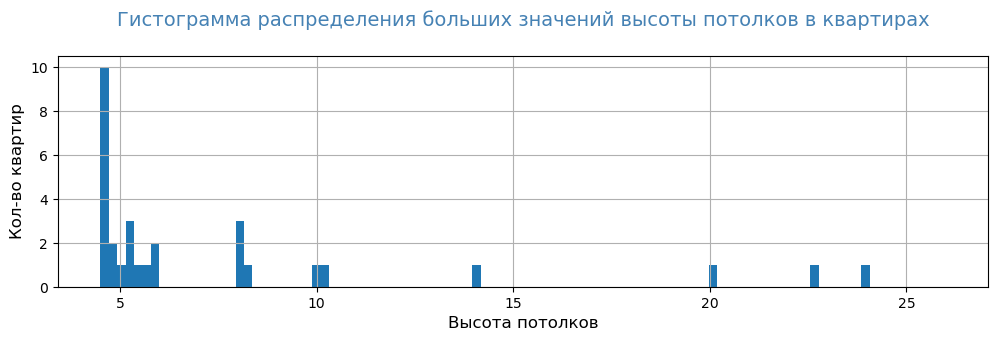

In [22]:
ax = df['ceiling_height'].hist(bins=100, figsize=(12,3), range=(4.5, 26))
ax.set_title('Гистограмма распределения больших значений высоты потолков в квартирах\n', 
             fontsize=14, color ='SteelBlue')
ax.set_xlabel('Высота потолков', fontsize=12)
ax.set_ylabel('Кол-во квартир', fontsize=12);

Видим, что высота потолков в квартирах больше 4.5 метров встречается редко, поэтому можно удалить строки, где значение в столбце `ceiling_height` больше 4.5 и меньше 2.5 метров.

#### 2.1.9. Удаление аномалий и подсчёт потерь данных

Удалим все найденный в пунктах 2.1.1-2.1.8 аномалии.

In [23]:
df = df.query('800_000 <= last_price <= 60_000_000 and (10 <= living_area <= 160 or living_area.isna()) and ' +
                '20 <= total_area <= 250 and (4 <= kitchen_area <= 40 or kitchen_area.isna()) and ' + 
                '(floors_total <= 37 or floors_total.isna()) and rooms <= 7 and (rooms > 0 or studio == True) and ' + 
                '(days_exposition >= 3 or days_exposition.isna()) and (2.5 <= ceiling_height <= 4.5 or ceiling_height.isna())')

Посчитаем, какой объём данных мы потеряли при удалении аномальных значений.

In [24]:
print(f'Объём удалённых данных: {round((1 - df.shape[0] / 23699) * 100, 1)}%') # 23699 - количество строк в исходном датафрейме

Объём удалённых данных: 2.6%


В результате удаления аномальных значений из датафрейма мы потеряли всего около 2.6% от исходных данных. Такие потери являются оптимальными.

### 2.2. Изучение пропущенных значений в столбцах

Для начала определим, в каких столбцах есть пропуски и их долю от общего количества строк.

In [25]:
# Функция, которая визуализирует объём пропусков в данных
def pass_value_barh(df):
    if df.isna().sum().sum() > 0:
        ax = (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by='space', ascending=True)
            .plot(kind='barh', figsize=(12,6), legend=False, fontsize=12, grid=True)
        )
        ax.set_title('Объём пропусков в данных \n', fontsize=14, color='SteelBlue')
        ax.set_ylabel('Названия столбцов', fontsize=12)
        ax.set_xlabel('% пропусков', fontsize=12)
    else:
        print('В датафрейме нет пропусков.')

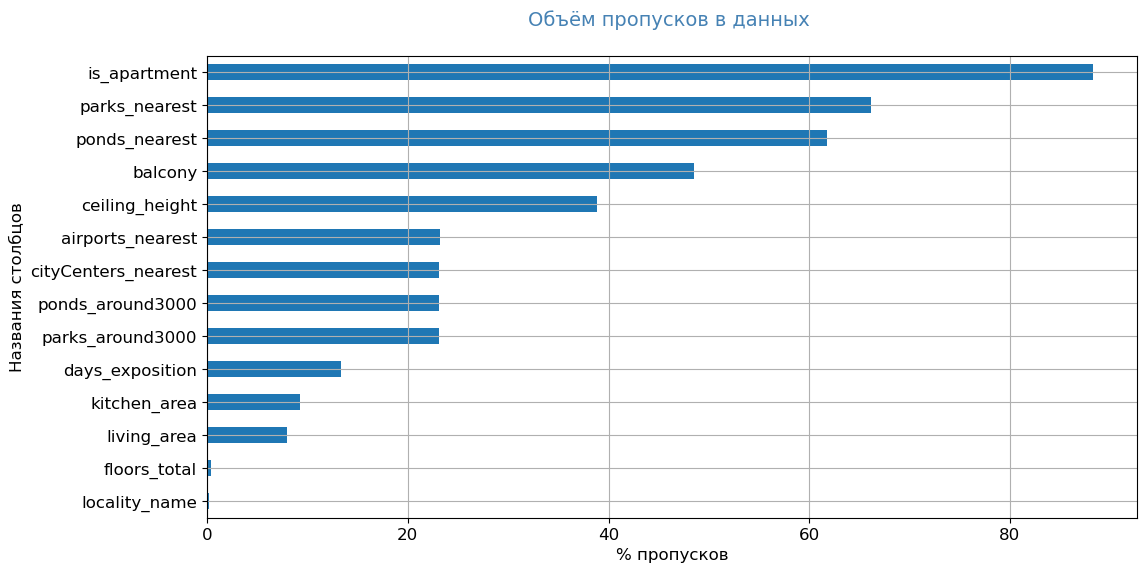

In [26]:
pass_value_barh(df)

Пропуски есть не во всех столбцах таблицы, но в большей их части, а именно в 14 столбцах из 22.
* В столбце `ceiling_height` пропуски могут быть вызваны, например, тем, что это поле необязательно для заполнения при размещении обяъявления, поэтому его и не заполняют, или тем, что человек может просто не знать точную высоту потолков в квартире. 
* Можно предположить, что пропуски в столбце `floors_total` связаны с тем, что в доме всего 1 этаж и поэтому их общее число не стали указывать. Однако, присмотревшись к данным, можно заметить, что таких случаев мало: в большинстве строк с пропусками в столбце `floors_total` в столбце `floor` указан не 1-ый этаж. Также причиной может быть то, что это поле необязательно для заполнения, поэтому его оставляли пустым.
* В столбцах `living_area`, `kitchen_area` пропуски могут быть связаны с тем, что люди не знают точную площадь жилых помещений или кухни, или что жилое помещение объединено с кухней как, например, в квартирах-студиях, из-за чего неверно будет указывать их площади по отдельности. Также если квартира является апартаментами, то люди могли не отметить размер жилой площади, поскольку апартаменты считаются нежилой недвижимостью.  
* Самая вероятная причина пропусков в столбце `is_apartment` это то, то квартира не является апартаментами, поэтому человек, размещающий объявление, просто ничего не стал отмечать в этом поле. 
* Наличие пропусков в столбце `balcony` вероятнее всего связано с тем, что в квартире балконов нет.
* Пропуски в столбце `locality_name` объяснить сложнее. Можно предположить, что человек забыл или случайно пропустил это поле при размещении объявления.
* Пропуски в оставшихся столбцах `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` и `days_exposition`. Вероятнее всего связаны с некорректной работой сервиса, поскольку это данные, которые вычисляются автоматически, а не добавляются пользователем.

Кроме того, пропуски во всех столбцах могут появляться из-за ошибок, возникающих при работе с данными (например, при их пересылки, копировании, переименовании и т.п.).

Заполнять пропуски в данном случае не требуется, однако, если бы это нужно было делать, то нам бы понадобилось глубже изучить взаимосвязь признаков друг с другом. Так, например, высота полотков квартир в историческом центре Санкт-Петербурга обычно выше, чем в современных новостройках, поэтому заполнить пропуски медианным или средним значениями было бы не правильно.

### 2.3. Типы данных в столбцах

Еще раз вызовем метод `info`, чтобы посмотреть какой тип данных имеет каждый столбец.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23073 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23073 non-null  int64  
 1   last_price            23073 non-null  float64
 2   total_area            23073 non-null  float64
 3   first_day_exposition  23073 non-null  object 
 4   rooms                 23073 non-null  int64  
 5   ceiling_height        14116 non-null  float64
 6   floors_total          22989 non-null  float64
 7   living_area           21245 non-null  float64
 8   floor                 23073 non-null  int64  
 9   is_apartment          2712 non-null   object 
 10  studio                23073 non-null  bool   
 11  open_plan             23073 non-null  bool   
 12  kitchen_area          20939 non-null  float64
 13  balcony               11885 non-null  float64
 14  locality_name         23025 non-null  object 
 15  airports_nearest   

Преобразуем типы данных в следующих столбцах.
* В столбце `first_day_exposition` поменяем тип с object на datetime, это позволит использовать встроенные инструменты pandas для работы с датой и временем при возникновении такой необходимости.
* В столбцах `floors_total`, `balcony`, `parks_around3000`, `ponds_around3000`, `days_exposition` изменим тип данных с float на int, поскольку количество этажей в доме, балконов в квартире, количество парков и водоёмов и число дней могут быть только целочисленными значениями.

In [28]:
df.loc[:, 'first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df = df.astype({'floors_total': 'Int64', 'balcony': 'Int64', 'parks_around3000': 'Int64', 'ponds_around3000': 'Int64'}, 
               errors='ignore')
df['days_exposition'] = df['days_exposition'].round().astype('Int64', errors='ignore')

Убедимся, что все изменения были выполнены, повторно вызвав метод `info`.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23073 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23073 non-null  int64         
 1   last_price            23073 non-null  float64       
 2   total_area            23073 non-null  float64       
 3   first_day_exposition  23073 non-null  datetime64[ns]
 4   rooms                 23073 non-null  int64         
 5   ceiling_height        14116 non-null  float64       
 6   floors_total          22989 non-null  Int64         
 7   living_area           21245 non-null  float64       
 8   floor                 23073 non-null  int64         
 9   is_apartment          2712 non-null   object        
 10  studio                23073 non-null  bool          
 11  open_plan             23073 non-null  bool          
 12  kitchen_area          20939 non-null  float64       
 13  balcony         

### 2.4. Изучение уникальных значений в столбце с названиями населённых пунктов и устранение неявных дубликатов

Неявные дубликаты будем искать в столбце `locality_name`. 
Посмотрим все уникальные значения в этом столбце и узнаем сколько их.

In [30]:
print('Количество уникальных названий населённых пунктов:', df['locality_name'].nunique())

Количество уникальных названий населённых пунктов: 349


In [31]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Всего 349 уникальных значений, не включая NaN. При таком количестве заметить неявные дубликаты на взгляд трудно, но всё же они есть, например 'посёлок Бугры', 'поселок Бугры', поэтому нужно их устранить. Можно также предположить, что значения, которые встречаются всего несколько раз могут быть дубликатами. Например, в 99 населённых пунктах размещены объявления о продаже квартир всего по 1 разу.

In [32]:
print('Количество населённых пунктов, в которых размещено только 1 объявление о продаже квартиры:', 
      (df['locality_name'].value_counts() == 1).sum())

Количество населённых пунктов, в которых размещено только 1 объявление о продаже квартиры: 99


Заметим, что в названии всех начелённых пунктов есть слово с заглавной буквы (имя собственное). Воспользуемся этим фактом, чтобы выделить из всех названий их собственные имена и искать неявные дубликаты с помощью них. Но для начала заменим все буквы `ё` в названиях населённых пунктов на `е`, чтобы было легче искать дубликаты.

In [33]:
df['locality_name'] = df['locality_name'].replace('ё', 'е', regex=True)
print('Количество уникальных названий населённых пунктов после замены "ё" на "е":', df['locality_name'].nunique())

Количество уникальных названий населённых пунктов после замены "ё" на "е": 315


Количество уникальных значений уменьшилось до 315. Это связано с тем, что, например, посёлок мог быть записан как через `ё`, так и через `е`.

Теперь устраним менее очевидные дубликаты. В значениях столбца `locality_name` могут встречаться как, названия населённых пунктов с одинаковым типом населённого пункта, но записанных по-разному, например, 'городской поселок' и 'поселок городского типа', так и населённые пункты, для которых тип не указан, причём могут быть и все варианты одновременно. Чтобы точно убедиться, что мы избавимся от всех дубликатов, оставим в названии локации только собственное имя населённого пункта. 
Однако тип населённого пункта тоже несёт важную информацию, например, можно предположить, что стоимость квартиры в посёлке городского типа больше, чем в деревне, но мы не увидим эту закономерность, если просто избавимся от типа населённого пункта. Создадим для него отдельный столбец `types_settlements`, предварительно устранив дубликаты. Чтобы это сделать, нужно узнать, какие уникальные значения типов населённых пунктов присутствуют в данных.  

In [34]:
# Функция для извлечения типа населённого пункта из его названия
# Пример: поселок Мурино -> поселок
def del_proper_noun(name):
    if name is np.nan:
        return name
    
    name = name.split()
    proper_noun = []
    for word in name:
        if word.istitle():
            proper_noun.extend(name[:name.index(word)])
            break
    return ' '.join(proper_noun)

In [35]:
df['locality_name'].apply(del_proper_noun).unique()

array(['', 'поселок', 'городской поселок', 'деревня',
       'поселок городского типа', 'садовое товарищество', 'село', nan,
       'поселок городского типа имени', 'поселок станции',
       'садоводческое некоммерческое товарищество',
       'поселок при железнодорожной станции', 'коттеджный поселок'],
      dtype=object)

Оказалось, что уникальных типов населённых пунктов всего 11, исключая значения NaN и населённые пункты, для которых тип не указан.
Можно произвести следующие замены в названиях типов населённых пунктов:
* 'городской поселок', 'поселок городского типа имени' на 'поселок городского типа';
* 'садоводческое некоммерческое товарищество' на 'садовое товарищество';
* 'поселок при железнодорожной станции' и 'поселок станции' на 'поселок при ж/д станции'.

In [36]:
# Функция для извлечения имени собственного населённого пункта
# Пример: поселок Мурино -> Мурино
def get_proper_noun(name):
    if name is np.nan:
        return name
    
    name = name.split()
    proper_noun = []
    for word in name:
        if word.istitle():
            proper_noun.extend(name[name.index(word):])
            break
    return ' '.join(proper_noun)

In [37]:
# Функция для приведения типов населённых пунктов к единому варианту написания
# Пример: 'городской поселок' и 'поселок городского типа имени' заменяются на 'поселок городского типа'
def locality_name_change(name):
    if name is np.nan:
        return name
    if 'город' in name and 'посел' in name:
        return 'поселок городского типа ' + get_proper_noun(name)
    if 'станц' in name and 'посел' in name:
        return 'поселок при ж/д станции ' + get_proper_noun(name)
    if 'сад' in name and 'товарищ' in name:
        return 'садовое товарищество ' + get_proper_noun(name)
    return name

In [38]:
df['locality_name'] = df['locality_name'].apply(locality_name_change)

Заметим вот какой момент: количество уникальных имён собственных населённых пунктов меньше, чем количество уникальных значений в столбце `locality_name`. Это вероятно связано с тем, что кто-то мог не указать, что посёлок является городским, или перепутать село и посёлок, или просто не написать тип населённого пункта. При создании нового столбца мы не будем искать и устранять дубликаты такого рода, поскольку пока не ясно понадобится нам эта информация для анализа или нет, в случае необходимости к этому вопросу можно вернуться.

In [39]:
print('Количество населённых пунктов с уникальным именем собственным:', df['locality_name'].apply(get_proper_noun).nunique())
print('Количество населённых пунктов с одинаковым полным названием:', df['locality_name'].nunique())

Количество населённых пунктов с уникальным именем собственным: 290
Количество населённых пунктов с одинаковым полным названием: 306


Теперь добавим в датафрейм новый столбец `types_settlements`, содержащий типы населённых пунктов, и удалим типы населённых пунктов из столбца `locality_name`. 

Выведем первые 5 строк датафрейма, чтобы посмотреть результат.

In [40]:
# Данную команду следует выполнять только один раз, поскольку при повторном выполнении 
# все типы населённых пунктов будут равны пустой строке
df['types_settlements'] = df['locality_name'].apply(del_proper_noun)

In [41]:
df['locality_name'] = df['locality_name'].apply(get_proper_noun)

In [42]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,types_settlements
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,NaN,...,<NA>,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,NaN,...,2,Шушары,12817.0,18603.0,0,NaN,0,NaN,81,поселок
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,
5,10,2890000.0,30.4,2018-09-10,1,NaN,12,14.4,5,NaN,...,<NA>,Янино-1,NaN,NaN,<NA>,NaN,<NA>,NaN,55,поселок городского типа
6,6,3700000.0,37.3,2017-11-02,1,NaN,26,10.6,6,NaN,...,1,Парголово,52996.0,19143.0,0,NaN,0,NaN,155,поселок


Теперь ещё раз посмотрим на список названий населённых пунктов, чтобы убедиться, что в нём нет дубликатов, вызванных ошибкой в написании, когда, например, вместо 'Санкт-Петербург' кто-то написал 'Санкт-Петербрг'.

In [43]:
sorted(df.query('~locality_name.isna()')['locality_name'].unique())

['Агалатово',
 'Александровская',
 'Алексеевка',
 'Аннино',
 'Аро',
 'Барышево',
 'Батово',
 'Бегуницы',
 'Белогорка',
 'Белоостров',
 'Бокситогорск',
 'Большая Вруда',
 'Большая Ижора',
 'Большая Пустомержа',
 'Большие Колпаны',
 'Большое Рейзино',
 'Большой Сабск',
 'Бор',
 'Борисова Грива',
 'Бугры',
 'Будогощь',
 'Ваганово',
 'Важины',
 'Вартемяги',
 'Вещево',
 'Виллози',
 'Вознесенье',
 'Возрождение',
 'Войсковицы',
 'Войскорово',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Вырица',
 'Высокоключевой',
 'Высоцк',
 'Гаврилово',
 'Гарболово',
 'Гатчина',
 'Гладкое',
 'Глажево',
 'Глебычево',
 'Глинка',
 'Гончарово',
 'Горбунки',
 'Гостилицы',
 'Громово',
 'Дзержинского',
 'Дружная Горка',
 'Дружноселье',
 'Дубровка',
 'Елизаветино',
 'Ефимовский',
 'Жилгородок',
 'Жилпоселок',
 'Житково',
 'Заводской',
 'Заклинье',
 'Заневка',
 'Запорожское',
 'Зеленогорск',
 'Зимитицы',
 'Ивангород',
 'Извара',
 'Ильичево',
 'Иссад',
 'Калитино',
 'Каложицы',
 'Кальтино',
 'Каменногорск',
 '

Видим, что в названиях населённых пунктов дубликатов нет.

## 3. Добавление новых столбцов в таблицу

Добавим в таблицу столбцы, которые нам дальше понадобятся для анализа:
* цена одного квадратного метра;
* день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «первый», «последний», «другой»);
* расстояние до центра города в километрах.

Чтобы посчитать цену квадратного метра, достаточно стоимость квартиры разделить на её площадь; новый столбец назовём `price_1_meter`.

In [44]:
df['price_1_meter'] = df['last_price'] / df ['total_area']

День недели публикации объявления получим, применив метод `dt.weekday` библиотеки `pandas`. Соответствующий столбец назовём `weekday_exposition`.

In [45]:
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday

Таким же способом получим месяц и год публикации объявления, применив соответственно методы `dt.month` и `dt.year`. Столбцы назовём `month_exposition` и `year_exposition`.

In [46]:
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year

Чтобы разложить этажи квартир по категориям, напишем функцию, которая будет принимать на вход строку нашего датафрейма, а возвращать объект типа str со значением «первый», «последний», «другой» или значение NaN, если этаж - не положительное значение, и передадим эту функцию методу `apply`. Новый столбец назовём `type_flat_floor`.
Также обратим внимание, что если в столбце `floors_total` значение равно NaN, а в столбце `floor` не 1, то в столбце `type_flat_floor` значение будет «другой». Это логично, учитывая, что нам не известно общее число этажей в доме.

In [47]:
# Функция для определения типа этажа квартиры: первый, последний или другой
def get_type_flat_floor(row):
    if row['floor'] <= 0:
        return np.nan
    if row['floor'] == 1:
        return 'первый'
    if pd.notna(row['floors_total']) and row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

In [48]:
df['type_flat_floor'] = df.apply(get_type_flat_floor, axis=1)

Также добавим столбец, в котором будет указано расстояние до центра города в километрах; для этого просто разделим на 1000 значения в столбце `cityCenters_nearest` и округлим до целых значений в большую сторону. Новый столбец назовём `distance_city_center_km`.

In [49]:
df['distance_city_center_km'] = (df['cityCenters_nearest'] / 1000).apply(np.ceil)

Выведем первые 5 строк таблицы, чтобы убедиться, что все столбцы были добавлены, и что в них ожидаемые значения.

In [50]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,types_settlements,price_1_meter,weekday_exposition,month_exposition,year_exposition,type_flat_floor,distance_city_center_km
0,20,13000000.0,108.0,2019-03-07,3,2.7,16,51.0,8,NaN,...,2,755.0,<NA>,,120370.370370,3,3,2019,другой,17.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,NaN,...,0,NaN,81,поселок,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,...,2,574.0,558,,92785.714286,3,8,2015,другой,14.0
5,10,2890000.0,30.4,2018-09-10,1,NaN,12,14.4,5,NaN,...,<NA>,NaN,55,поселок городского типа,95065.789474,0,9,2018,другой,NaN
6,6,3700000.0,37.3,2017-11-02,1,NaN,26,10.6,6,NaN,...,0,NaN,155,поселок,99195.710456,3,11,2017,другой,20.0


## 4. Исследовательский анализ данных

### 4.1. Изучим параметры квартир из объявлений

Изучим следующие параметры объектов:
* общая площадь;
* жилая площадь;
* площадь кухни;
* цена объекта;
* количество комнат;
* высота потолков;
* этаж квартиры;
* тип этажа квартиры («первый», «последний», «другой»);
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего аэропорта;
* расстояние до ближайшего парка;
* день и месяц публикации объявления.

Для этого построим диаграммы распределения для каждого из этих параметров.

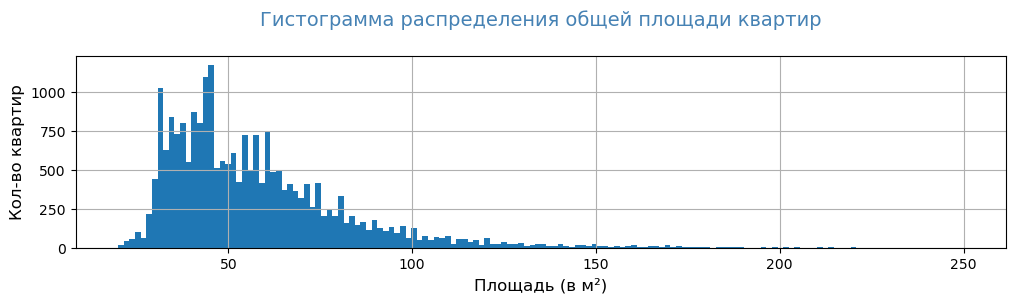

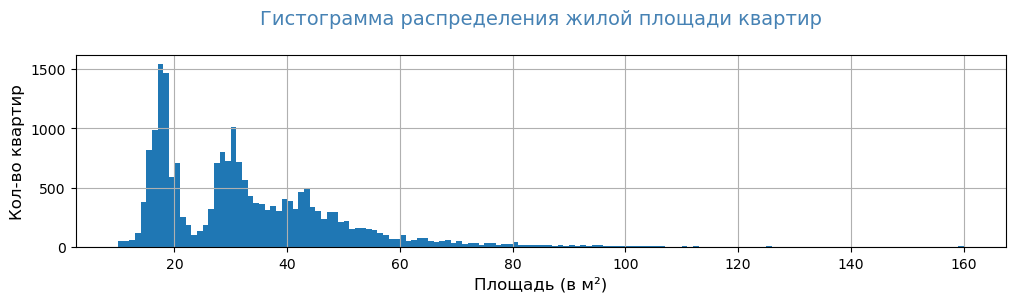

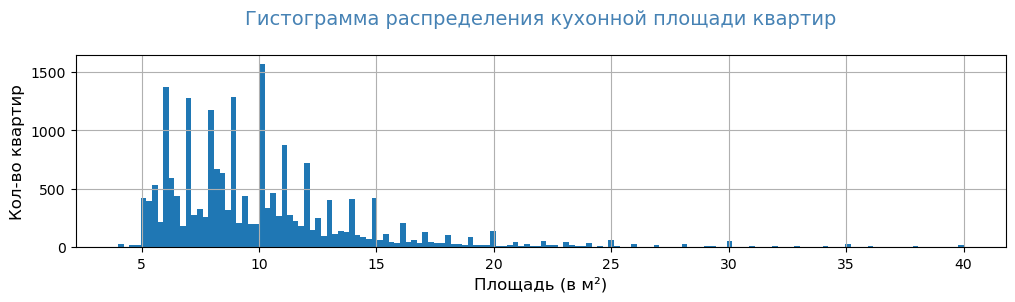

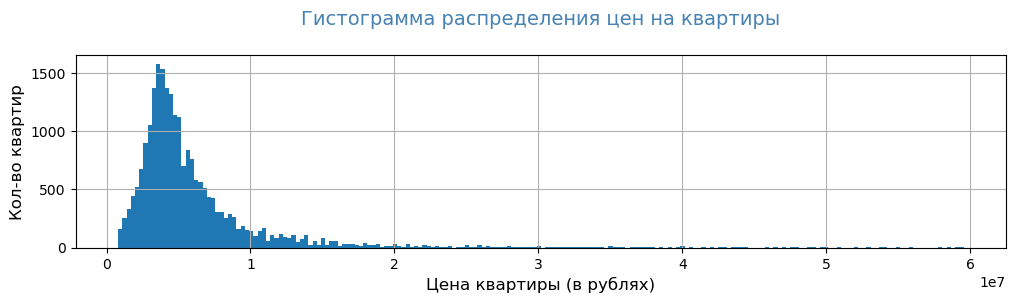

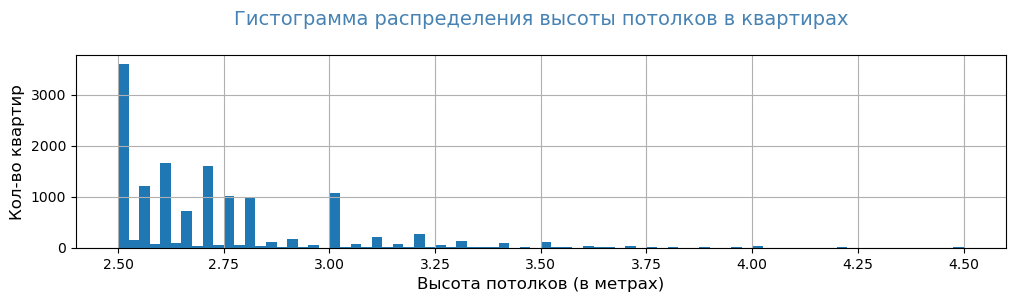

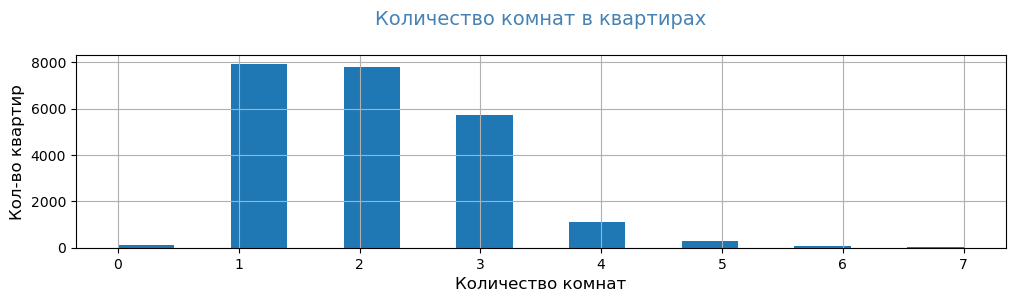

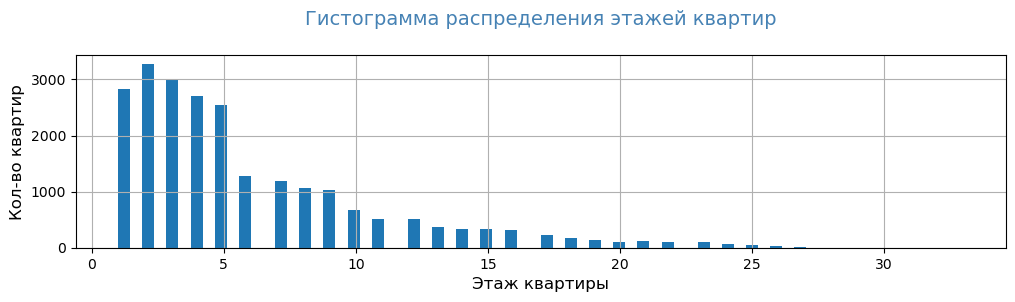

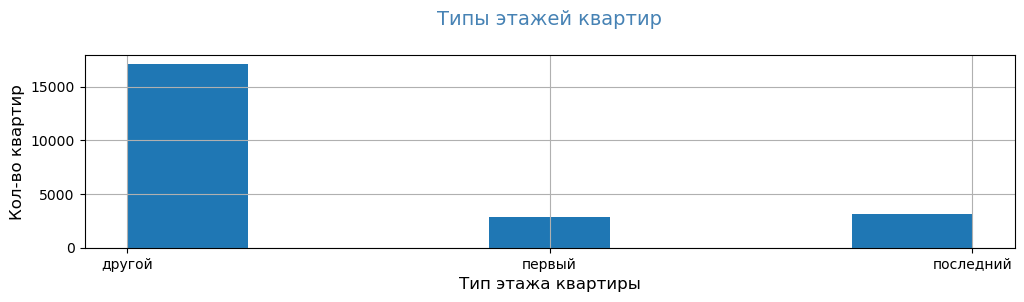

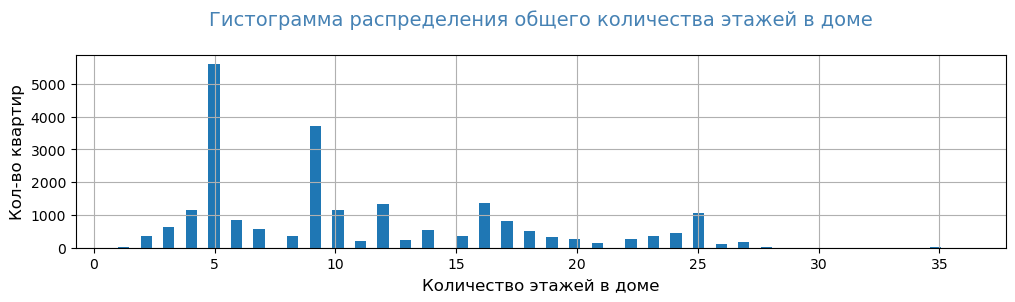

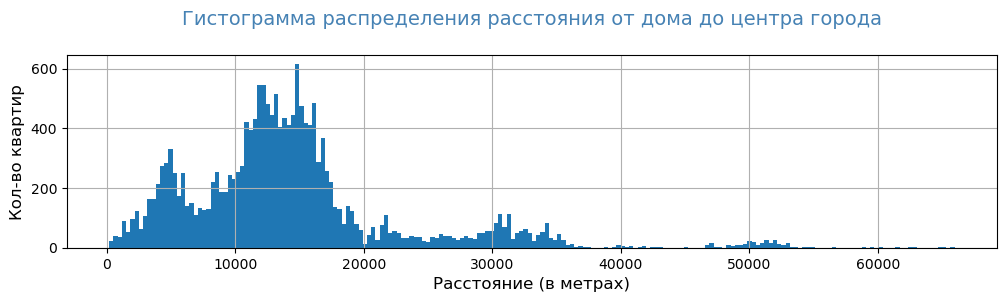

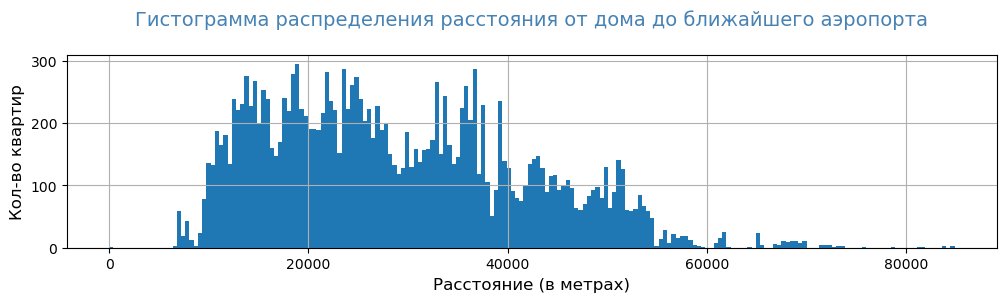

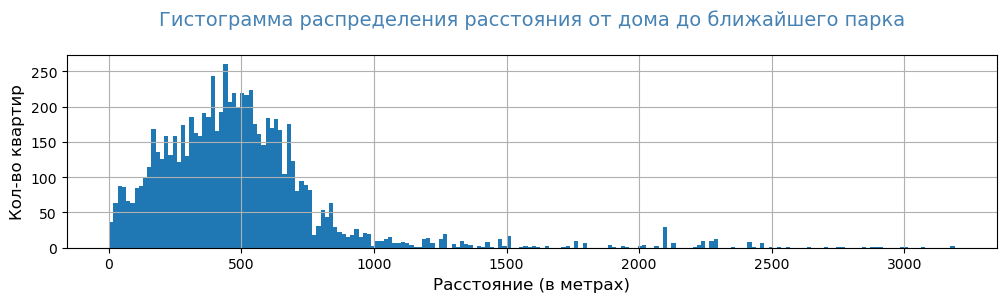

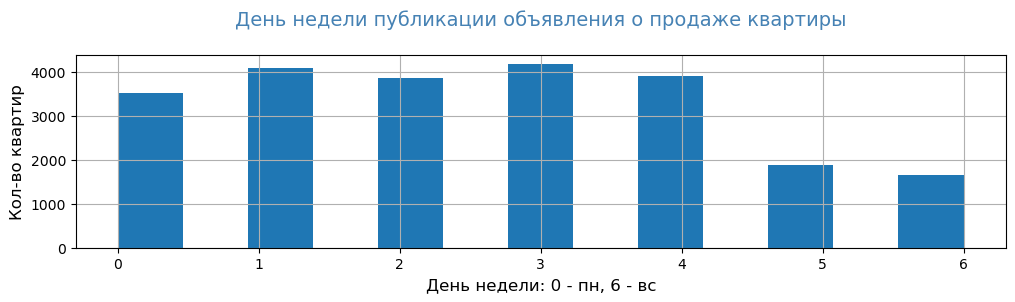

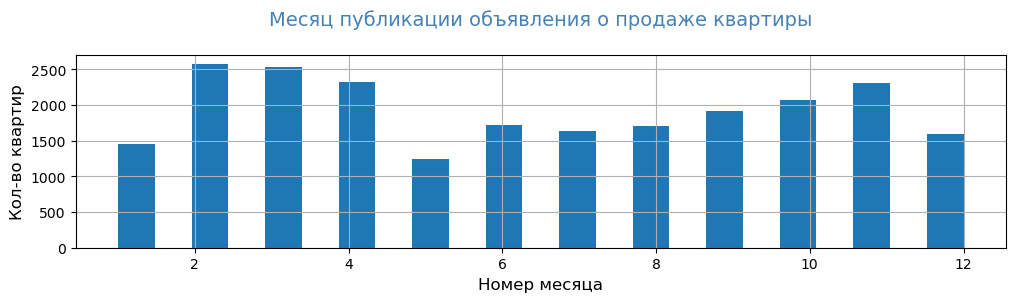

In [51]:
col_for_hist = [('total_area', 150, 'Гистограмма распределения общей площади квартир', 'Площадь (в м²)'), 
                ('living_area', 150, 'Гистограмма распределения жилой площади квартир', 'Площадь (в м²)'), 
                ('kitchen_area', 150, 'Гистограмма распределения кухонной площади квартир', 'Площадь (в м²)'), 
                ('last_price', 200, 'Гистограмма распределения цен на квартиры', 'Цена квартиры (в рублях)'), 
                ('ceiling_height', 80, 'Гистограмма распределения высоты потолков в квартирах', 'Высота потолков (в метрах)'),
                ('rooms', 15, 'Количество комнат в квартирах', 'Количество комнат'), 
                ('floor', 70, 'Гистограмма распределения этажей квартир', 'Этаж квартиры'), 
                ('type_flat_floor', 7, 'Типы этажей квартир', 'Тип этажа квартиры'), 
                ('floors_total', 75, 'Гистограмма распределения общего количества этажей в доме', 'Количество этажей в доме'), 
                ('cityCenters_nearest', 200, 'Гистограмма распределения расстояния от дома до центра города', 
                 'Расстояние (в метрах)'), 
                ('airports_nearest', 200, 'Гистограмма распределения расстояния от дома до ближайшего аэропорта', 
                 'Расстояние (в метрах)'), 
                ('parks_nearest', 200, 'Гистограмма распределения расстояния от дома до ближайшего парка', 
                 'Расстояние (в метрах)'), 
                ('weekday_exposition', 13, 'День недели публикации объявления о продаже квартиры', 
                 'День недели: 0 - пн, 6 - вс'), 
                ('month_exposition', 23, 'Месяц публикации объявления о продаже квартиры', 'Номер месяца')
               ]

for col in col_for_hist:
    ax = df[col[0]].hist(bins=col[1], figsize=(12, 2.5))
    ax.set_title(col[2]+'\n', fontsize=14, color='SteelBlue')
    ax.set_xlabel(col[3], fontsize=12)
    ax.set_ylabel('Кол-во квартир', fontsize=12)
    plt.show()

По гистограммам можно увидеть следующие особенности данных в столбцах.
* Большинство продаваемых квартир имеет площадь от 30 до 65 м², а квартиры с площадью больше 200 м² встречаются крайне редко.
* Жилая площадь в квартирах в среднем составляет 20-35 м². Интересно, что в районе 25 м² на гистограмме наблюдается "глубокая яма": квартир с жилой площадью около 25 м² примерно в 5 раз меньше, чем квартир с жилой площадью около 20 м², и примерно в 4, чем квартир с жилой площадью около 30 м². Чем вызвано такое распределение данных без более глубокого анализа сказать трудно: возможно квартир с жилой площадью 25 м², просто меньше строят и поэтому их меньше на рынке, а возможно их в силу каких-то факторов меньше продают. Квартиры с жилой площадью более 100 м². 
* Площадь кухни в продающихся квартирах в среднем составляет от 5 до 12 м², а кухни с площадью более 30 м² встречаются крайне редко. Интересно, что на графике наблюдаются высокие столбики в районе целых чисел (6, 7, 8, 9 и т.д.); это может говорить о том, что кухни принято делать стандартных размеров с целым количеством квадратных метров.
* Медианное значение стоимости квартир равно примерно 4-5 млн рублей. Около 90% квартир стоят меньше 10  млн рублей. Квартиры стоимостью более 30 млн встречаются крайне редко. 
* Количество комнат в квартире чаще равно 1 или 2, причём частота их встречаемости в датафрейме примерно одинаковая. Примерно на 30% меньше объявлений о продаже 3-комнатных квартир. Квартиры, более чем с 6 комнатами, крайне редки. Также есть квартиры с 0 количеством комнат; это квартиры-студии, так как остальные объявления о продаже квартир с 0 количеством комнат и не являющихся студиями, мы ранее удалили, посчитав их аномалиями.
* Квартиры с высотой потолков 2.5 метра встречаются чаще остальных. Большинство квартир имеет высоту потолков от 2.5 до 2.8 метров, а квартиры с высотой потолков боле 3.5 метров встречаются крайне редко.
* Количество продаваемых квартир на первом и последнем этажах примерно одинаковое, но на последнем всё-таки немного больше. Количество объявлений о продаже квартир на средних этажах составляет более 70% от всей выборки.
* Распределение в столбце с этажами квартир выглядит ожидаемо: количество продающихся квартир тем меньше, чем выше этаж. Это связано с тем, что, например, квартиры на 1-2 этаже есть в каждом, даже в малоэтажном доме, а вот квартир на 20 этаже продаётся мало, поскольку таких высоких зданий также мало. Кроме того, в деревнях, посёлках городского типа и т.п. преимущественно малоэтажные здания, а в датафрейме большое количество объявлений о продаже квартир в этих населённых пунктах, что соответственно также ведёт к тому, что квартир на нижних этажах в датафрейме больше.
* Довольно неожиданное распределение наблюдается в столбце с общим количеством этажей в доме. Логично было бы предположить, что чем больше в доме этажей, тем меньше такие дома встречаются. За исключением малоэтажных домов, поскольку в данных много объявлений о продаже квартир в деревнях, посёлках и т.п. Однако в действительности мы наблюдаем пики в районе 5, 9, 10, 12, 16 и 25, причём пики соответствующие значениям 5 и 9 довольно высокие, в отличие от остальных. Чем вызвано такое распределение без более глубокого анализа установить не получится: возможно просто дома с таким количеством этажей строят больше, поэтому и объявлений о продаже квартир, находящихся на этих этажах, больше; а может есть ещё какие-то неизвестные нам факторы, из-за которых квартиры на этих этажах продаются чаще.
* Для большинства продающихся квартир расстояние до центра города составляет до 20 км, а в среднем около 15. Можно заметить небольшие "бугорки" в районе 30 км и 50 км; можно предположить, что они соответствуют населённым пунктам, находящимся на таком расстоянии от центра Санкт-Петербурга.
* Расстояние до аэропорта имеет более широкое распределение: большая часть значений попадает в диапазон от 10 км до 55 км. Такое распределение ожидаемо, поскольку аэропорт находится за чертой города, поэтому даже от квартир, находящихся в Санкт-Петербурге, каких большинство в датафрейме, расстояние до аэропорта будет немаленьким.
* Для большинства квартир расстояние для ближайшего парка менее 1 км, в среднем около 500 метров
* Довольно интересно распределение наблюдается по дням размещения объявлений о продаже квартир. Можно было предположить, что во все дни недели количество размещаемых объявлений будет примерно одинаковым, однако, как оказалось, в будние дни объявления размещают чаще, чем в выходные.
* Похожая ситуация и с месяцем размещения объявления. Как оказалось, чаще размещают объявления о продаже в феврале, марте, апреле и осенью, а вот летом и в первые 2 месяца зимы значительно реже. Интересно, что февраль (самый короткий месяц) опережает остальные по количеству размещаемых объявлений о продаже квартир. Это может быть связано с тем, что, как гласит информация из интернета, с окончанием зимы на рынке недвижимости обычно наступает оживление, больше активности проявляют и продавцы и покупатели.

### 4.2. Скорость продажи квартир

Построим гистограмму по столбцу `days_exposition`, значения в котором показывают сколько дней было размещено каждое объявление. 

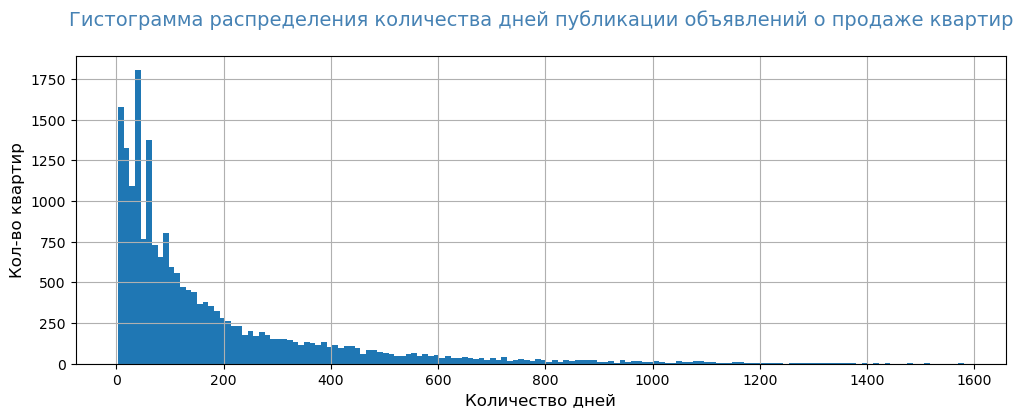

In [52]:
ax = df['days_exposition'].hist(bins=150, figsize=(12, 4))
ax.set_title('Гистограмма распределения количества дней публикации объявлений о продаже квартир\n', 
             fontsize=14, color='SteelBlue')
ax.set_xlabel('Количество дней', fontsize=12)
ax.set_ylabel('Кол-во квартир', fontsize=12);

На гистограмме видно несколько высоких пиков, посмотрим, каким значениям они соответствуют.

In [53]:
df['days_exposition'].value_counts().head(5)

45    837
60    537
7     225
30    205
90    194
Name: days_exposition, dtype: Int64

Видим, что одни из самых часто встречаемых значений в этом столбце - это значения 7, 30, 45, 60 и 90. Значение 7 объясняется либо быстрыми продажами, либо тем, что человек, возможно, передумал продавать квартиру и снял объявление вскоре после его размещения на сайте. А вот, чтобы объяснить остальные значения, обратимся к условиям размещения объявлений о продаже квартир на сайте Яндекс.Недвижимость, откуда и взяты данные. Согласно этим условиям сейчас срок бесплатного размещения объявления о продаже квартиры в Санкт-Петербурге и Ленинградской области составляет 365 дней, однако, для других регионов условия следующие: срок бесплатного размещения объявления о продаже квартиры стоимостью до 4.5 млн — 45 дней, от 4.5 до 10 млн — 60 дней, от 10 млн — 90 дней. И хотя у нас в данных присутствует только информация о продаже квартир в Санкт-Петербурге и Ленинградской области, а не в регионах, но явно прослеживается связь пиков на гистограмме и условий бесплатного размещения объявлений о продаже квартир в других регионах. Несоответствие пиков на гистограмме с условиями размещения может быть объяснено тем, что в датафрейме содержатся данные о продаже квартир в период с 2014 по 2019 год, тогда как сейчас 2023 год, соответственно за это время срок бесплатного размещения объявлений мог измениться.

Теперь найдём среднее и медиану столбца `days_exposition`.

In [54]:
print('Среднее время продажи квартир: ', round(df['days_exposition'].mean(), 1))
print('Медианное время продажи квартир: ', df['days_exposition'].median())

Среднее время продажи квартир:  180.2
Медианное время продажи квартир:  95.0


Получили, что среднее время продаж практически в 2 раза больше медианного.

Как видно по гистограмме большая часть значений сосредоточена в диапазоне от 0 до 100, отсюда и получили соответствующую медиану. Однако в столбце присутствуют значения, которые на порядок больше, и хотя их немного, но они вносят существенный вклад в среднее значение.

Чтобы посмотреть, какие значения и как много оказалось в дали от медианы, построим диаграмму размаха.

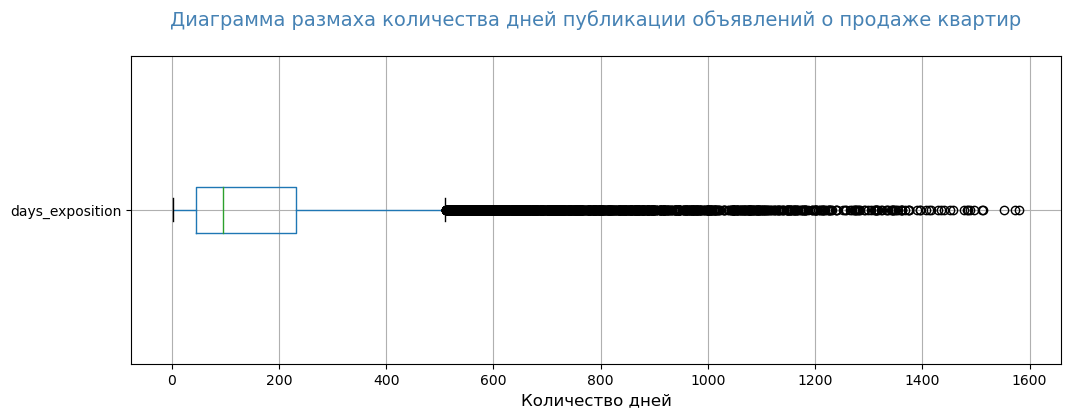

In [55]:
ax = df.boxplot(column='days_exposition', vert=False, figsize=(12, 4))
ax.set_title('Диаграмма размаха количества дней публикации объявлений о продаже квартир\n', 
             fontsize=14, color='SteelBlue')
ax.set_xlabel('Количество дней', fontsize=12);

По диаграмме размаха можно определить, какие продажи квартир можно считать очень быстрыми, а какие чересчур долгими. К быстрым продажам можно отнести те, которые попадают в диапазон нижнего "усика"; такие продажи происходят за время от 0 до 45 дней (значение первого квартиля). К слишком долгим продажам можно отнести продажи, которые попали в диапазон верхнего "усика" диаграммы, то есть те, которые происходили за более, чем 230 дней; такие продажи составляют 25%.

Проверим, менялась ли скорость продажи квартир по годам, для этого построим соответствующий график.

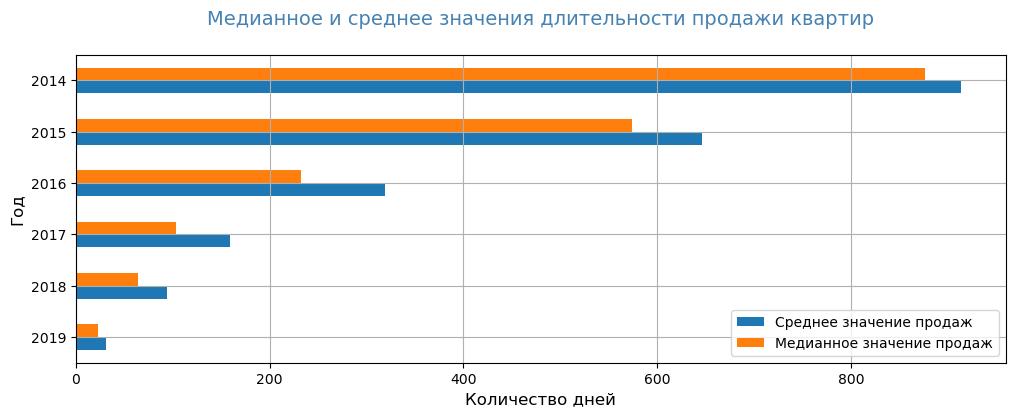

In [56]:
ax = (
    df
    .groupby('year_exposition')['days_exposition']
    .agg(['mean', 'median'])
    .sort_values(by='mean')
    .plot(kind='barh', figsize=(12, 4), grid=True)
)
ax.set_title('Медианное и среднее значения длительности продажи квартир\n', fontsize=14, color ='SteelBlue')
ax.set_xlabel('Количество дней', fontsize=12)
ax.set_ylabel('Год', fontsize=12)
plt.legend(['Среднее значение продаж', 'Медианное значение продаж']);

Видим, что длительность продажи квартиры в период с 2014 по 2019 год с каждым годом сокращалась, причём как минимум на 35% по сравнению с предыдущим годом. То есть с каждым годом квартиры продаются всё быстрее и быстрее.

### 4.3. Влияние различных факторов на общую стоимость квартиры

Изучим, зависит ли цена от:
* общей площади;
* жилой площади;
* площади кухни;
* количества комнат;
* этажа, на котором расположена квартира (первый, последний, другой);
* даты размещения (день недели, месяц, год).

Для этого построим соответствующие диаграммы рассеяния и посчитаем коэффициенты корреляции для не категориальных столбцов.

#### 4.3.1. Зависимость цены квартиры от общей площади

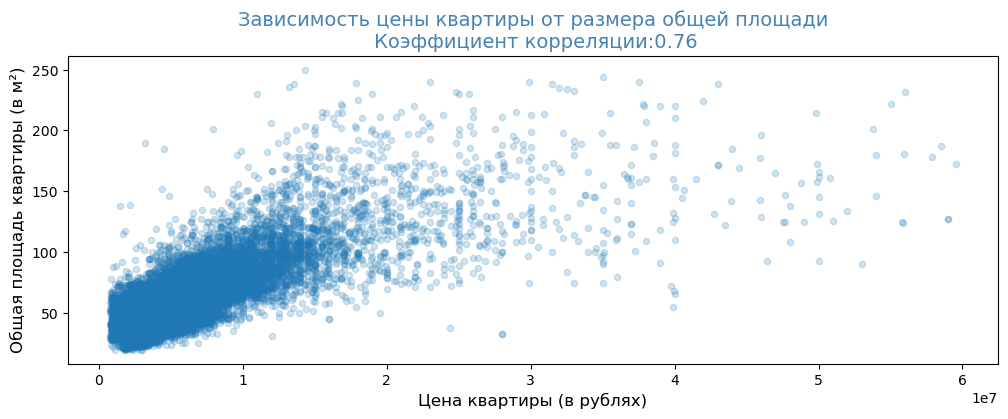

In [57]:
ax = df.plot(y='total_area', x='last_price', kind='scatter', alpha=0.2, figsize=(12, 4))
ax.set_title('Зависимость цены квартиры от размера общей площади\n Коэффициент корреляции:' + \
             str(round(df['last_price'].corr(df['total_area']), 2)), fontsize=14, color ='SteelBlue')
ax.set_xlabel('Цена квартиры (в рублях)', fontsize=12)
ax.set_ylabel('Общая площадь квартиры (в м²)', fontsize=12);

По диаграмме видно, что зависимость между ценой и площадью ожидаемо есть: чем больше площадь квартиры, тем выше её стоимость, - что также подтверждает достаточно большое значение коэффициента корреляции.

#### 4.3.2. Зависимость цены квартиры от жилой площади

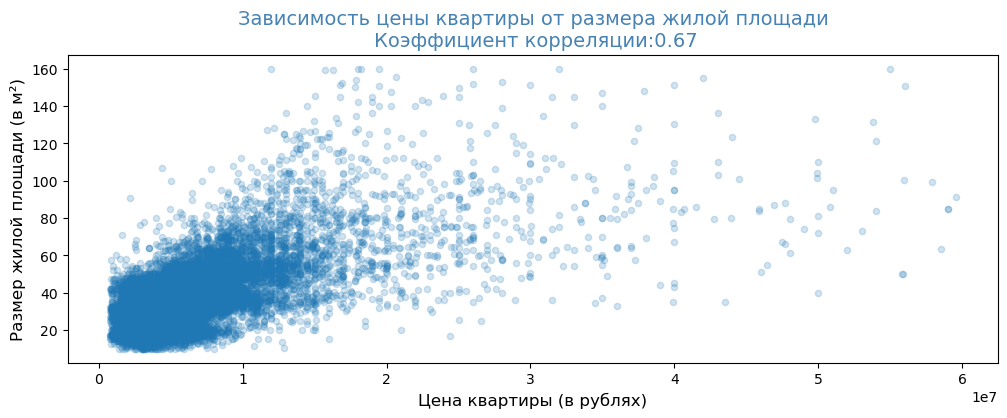

In [58]:
ax = df.plot(y='living_area', x='last_price', kind='scatter', alpha=0.2, figsize=(12, 4))
ax.set_title('Зависимость цены квартиры от размера жилой площади\n Коэффициент корреляции:' + \
             str(round(df['last_price'].corr(df['living_area']), 2)), fontsize=14, color ='SteelBlue')
ax.set_xlabel('Цена квартиры (в рублях)', fontsize=12)
ax.set_ylabel('Размер жилой площади (в м²)', fontsize=12);

Прямая зависимость между ценой квартиры и её жилой площадью явно выражена: диаграмма рассеяния похожа на предыдущую, однако, коэффициент корреляции немного меньше, чем между ценой квартиры и общей площадью. 

#### 4.3.3. Зависимость цены квартиры от площади кухни

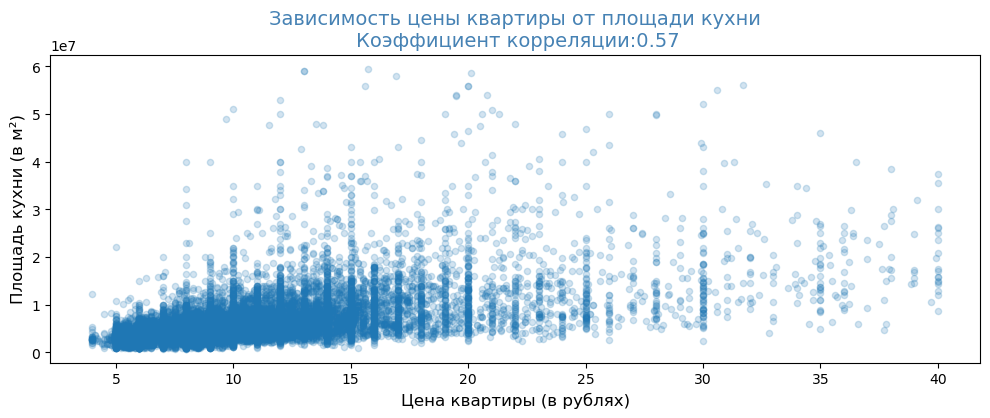

In [59]:
ax = df.plot(y='last_price', x='kitchen_area', kind='scatter', alpha=0.2, figsize=(12, 4))
ax.set_title('Зависимость цены квартиры от площади кухни\n Коэффициент корреляции:' + \
             str(round(df['last_price'].corr(df['kitchen_area']), 2)), fontsize=14, color ='SteelBlue')
ax.set_xlabel('Цена квартиры (в рублях)', fontsize=12)
ax.set_ylabel('Площадь кухни (в м²)', fontsize=12);

Зависимость между ценой квартиры и кухонной площадью уже не такая сильная, как между ценой и общей и жилой площадью, однако, эта зависимость прослеживается на диаграмме рассеяния. Коэффициент корреляции также подтверждает наличие между ними прямой, но не сильно вяраженной зависимости. 

#### 4.3.4. Зависимость цены квартиры от количества комнат

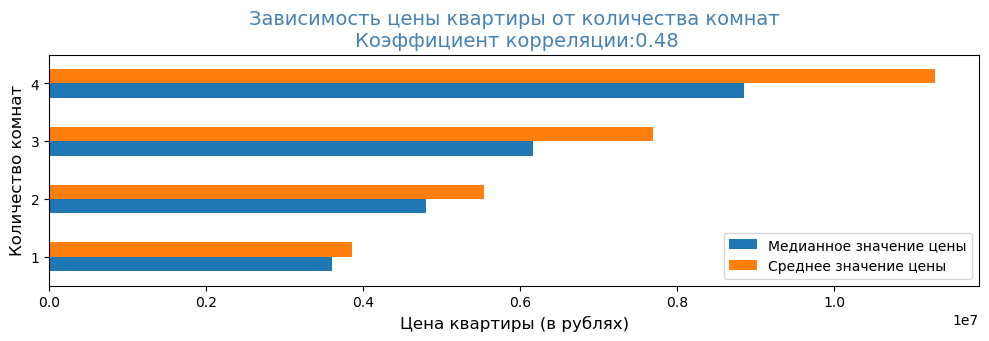

In [60]:
ax = (
    df
    .groupby(by='rooms')['last_price']
    .agg(['median', 'mean', 'count'])
    .query('count > 500')[['median', 'mean']]
    .plot(kind='barh', figsize=(12, 3))
)
ax.set_title('Зависимость цены квартиры от количества комнат\n Коэффициент корреляции:' + \
             str(round(df['last_price'].corr(df['rooms']), 2)), fontsize=14, color ='SteelBlue')
ax.set_xlabel('Цена квартиры (в рублях)', fontsize=12)
ax.set_ylabel('Количество комнат', fontsize=12)
plt.legend(['Медианное значение цены', 'Среднее значение цены']);

По диаграмме видно, что чем больше количество комнат, тем выше цена квартиры; это прослеживается для квартир с количеством комнат от 1 до 4. Группы с квартирами с количеством комнат 0 и от 5 до 10 малочисленные; их недостаточно для анализа.

Интересно также, что чем меньше количество комнат, тем меньше разница между медианным и среднем значением цены квартиры. Это говорит о том, что чем меньше количество комнат, тем реже встречаются предложения о продаже квартир по стоимости сильно выше, чем продаётся большинство квартир с таким же количеством комнат. То есть чем меньше количество комнат, тем меньше разброс цен на квартиры.

#### 4.3.5. Зависимость цены квартиры от этажа

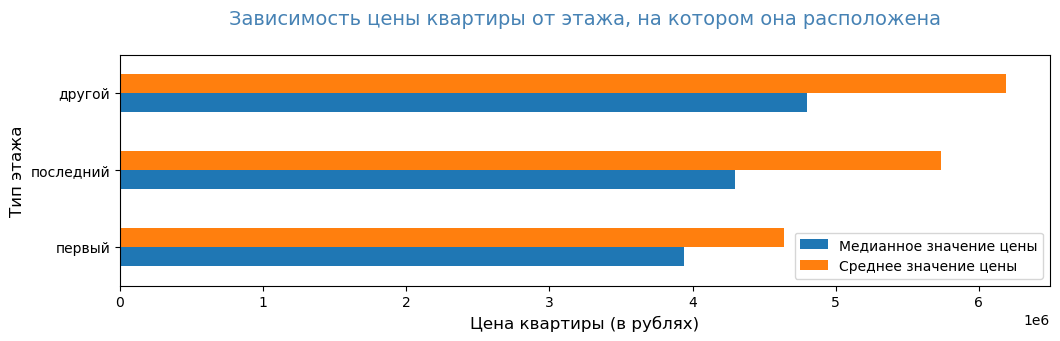

In [61]:
ax = (
    df
    .groupby(by='type_flat_floor')['last_price']
    .agg(['median', 'mean', 'count'])
    .query('count > 500')[['median', 'mean']]
    .sort_values('median')
    .plot(kind='barh', figsize=(12, 3))
)
ax.set_title('Зависимость цены квартиры от этажа, на котором она расположена\n', fontsize=14, color ='SteelBlue')
ax.set_xlabel('Цена квартиры (в рублях)', fontsize=12)
ax.set_ylabel('Тип этажа', fontsize=12)
plt.legend(['Медианное значение цены', 'Среднее значение цены']);

По диаграмме видно, что квартиры на первом этаже стоят меньше, чем квартиры на всех остальных этажах, а квартиры на средних этажах дороже, чем на последнем и первом. 

#### 4.3.6. Зависимость цены квартиры от дня недели размещения объявления о её продаже

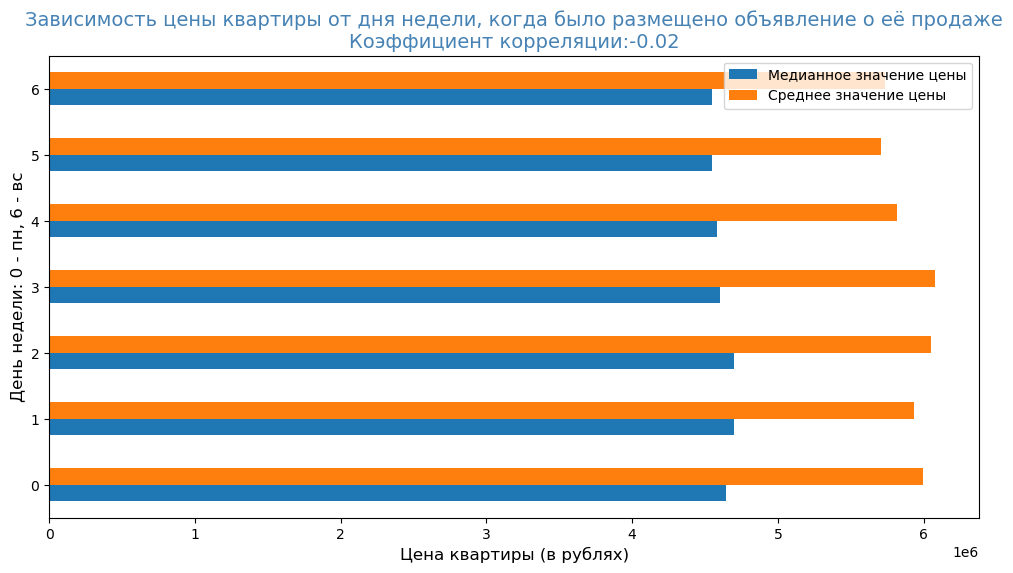

In [62]:
ax = (
    df
    .groupby(by='weekday_exposition')['last_price']
    .agg(['median', 'mean', 'count'])
    .query('count > 500')[['median', 'mean']]
    .plot(kind='barh', figsize=(12, 6))
)
ax.set_title('Зависимость цены квартиры от дня недели, когда было размещено объявление о её продаже\n' +
              'Коэффициент корреляции:' + str(round(df['last_price'].corr(df['weekday_exposition']), 2)),
             fontsize=14, color ='SteelBlue')
ax.set_xlabel('Цена квартиры (в рублях)', fontsize=12)
ax.set_ylabel('День недели: 0 - пн, 6 - вс', fontsize=12)
plt.legend(['Медианное значение цены', 'Среднее значение цены']);

По графику и значению коэффициента корреляции видно, что цена квартиры не зависит от дня недели, когда было размещено объявление о её продаже, что вполне ожидаемо. 

#### 4.3.7. Зависимость цены квартиры от месяца размещения объявления о её продаже

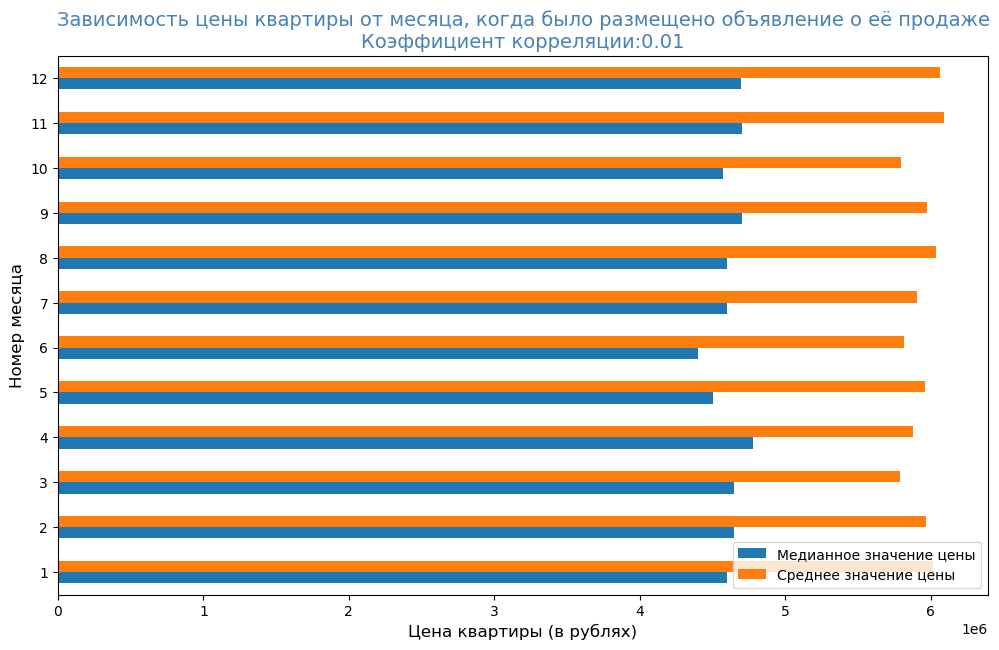

In [63]:
ax = (
    df
    .groupby(by='month_exposition')['last_price']
    .agg(['median', 'mean', 'count'])
    .query('count > 500')[['median', 'mean']]
    .plot(kind='barh', figsize=(12, 7))
)
ax.set_title('Зависимость цены квартиры от месяца, когда было размещено объявление о её продаже\n' +
              'Коэффициент корреляции:' + str(round(df['last_price'].corr(df['month_exposition']), 2)),
             fontsize=14, color ='SteelBlue')
ax.set_xlabel('Цена квартиры (в рублях)', fontsize=12)
ax.set_ylabel('Номер месяца', fontsize=12)
plt.legend(['Медианное значение цены', 'Среднее значение цены']);

Ожидаемо, что как и в предыдущем случае, по графику и значению коэффициента корреляции видно, что цена квартиры не зависит от месяца, когда было размещено объявление о её продаже.

#### 4.3.8. Зависимость цены квартиры от года размещения объявления о её продаже

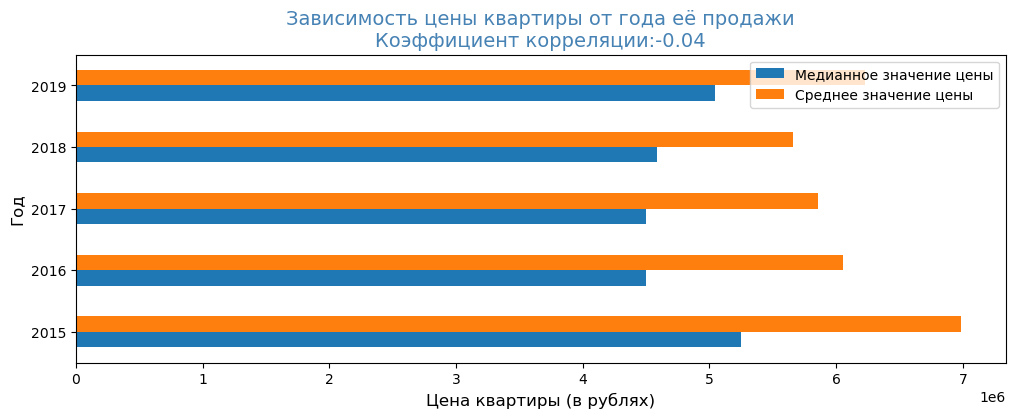

In [64]:
ax = (
    df
    .groupby(by='year_exposition')['last_price']
    .agg(['median', 'mean', 'count'])
    .query('count > 500')[['median', 'mean']]
    .plot(kind='barh', figsize=(12, 4))
)
ax.set_title('Зависимость цены квартиры от года её продажи\n' +
              'Коэффициент корреляции:' + str(round(df['last_price'].corr(df['year_exposition']), 2)),
             fontsize=14, color ='SteelBlue')
ax.set_xlabel('Цена квартиры (в рублях)', fontsize=12)
ax.set_ylabel('Год', fontsize=12)
plt.legend(['Медианное значение цены', 'Среднее значение цены']);

Заметим, что на графике не отражены данные о ценах на квартиры за 2014 год, поскольку данных за этот год мало и их было бы не корректно сравнивать с данными за другие годы.  

По графику видно, что в 2016 году стоимость квартир снизилась. А вот что происходило с ценами на квартиры в период с 2016 по 2019 год неочевидно. В 2016-2018 годах медианная стоимость квартир была примерно одинаковой, а вот средняя стоимость в течении этих лет снижалась. Заметный рост цен наблюдается в 2019 году, однако, в датафрейме содержатся данные о продажах квартир только в первые несколько месяцев этого года, поэтому делать выводы о том, что в 2019 году цены выросли нельзя из-за недостатка данных. 

Коэффициент корреляции подтверждает, что линейной связи между ценой квартиры и годом её продаж нет. Однако личный опыт говорит нам о том, что недвижимость со временем дорожает. Возможно, сказалось влияние других факторов, например, площади квартир: посмотрим как она менялась с годами. Также рассчитаем медианное значение стоимости 1-го квадратного метра, поскольку если площадь квартир с каждым годом менялась, то правильнее будет сравнивать стоимость 1-го квадратного метра в разные годы, а не стоимость квартир в целом, которая зависит от их метража. Можно также предположить, что в Санкт-Петербурге цены на квартиры по годам изменялись не также, как в других населённых пунктах Ленинградской области, поэтому построим для них отдельные графики.

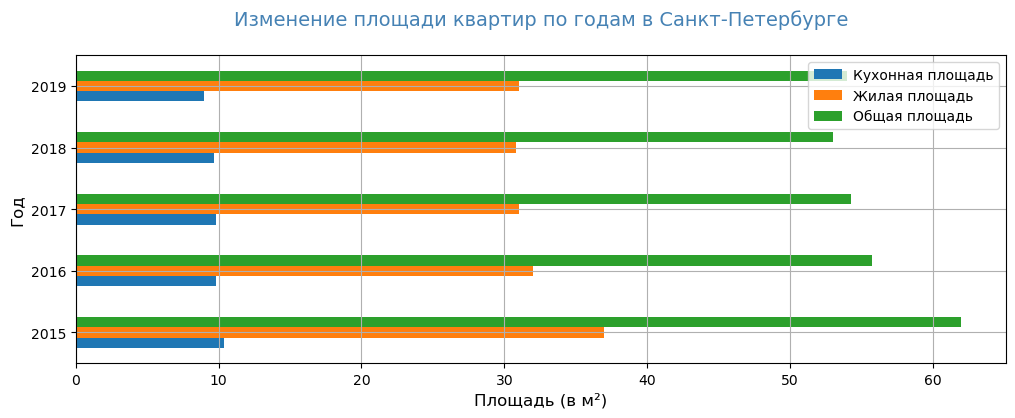

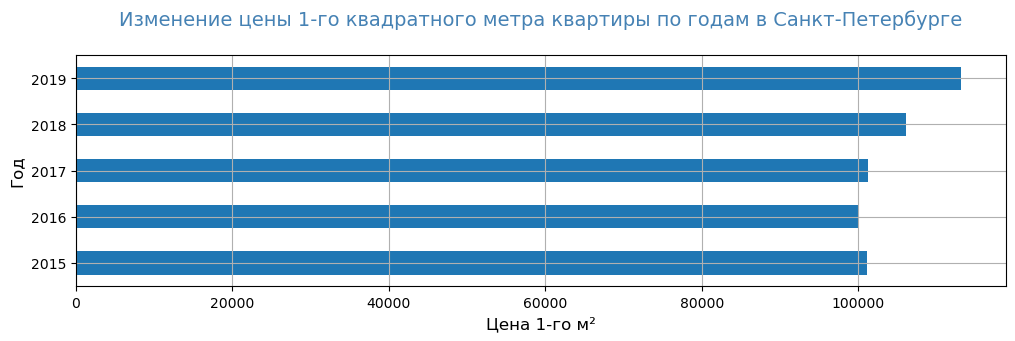

In [65]:
data_spb = (
    df[(df['locality_name'] == 'Санкт-Петербург') & (df['year_exposition'] != 2014)]
    .pivot_table(index='year_exposition', 
                 values=['total_area', 'living_area', 'kitchen_area', 'price_1_meter'], 
                 aggfunc='median')
)

ax = data_spb[['kitchen_area', 'living_area', 'total_area']].plot(kind='barh', figsize=(12, 4), grid=True)
ax.set_title('Изменение площади квартир по годам в Санкт-Петербурге\n', fontsize=14, color ='SteelBlue')
ax.set_xlabel('Площадь (в м²)', fontsize=12)
ax.set_ylabel('Год', fontsize=12)
plt.legend(['Кухонная площадь', 'Жилая площадь', 'Общая площадь'])
plt.show()

ax = data_spb['price_1_meter'].plot(kind='barh', figsize=(12,3), grid=True)
ax.set_title('Изменение цены 1-го квадратного метра квартиры по годам в Санкт-Петербурге\n', fontsize=14, color ='SteelBlue')
ax.set_xlabel('Цена 1-го м²', fontsize=12)
ax.set_ylabel('Год', fontsize=12);

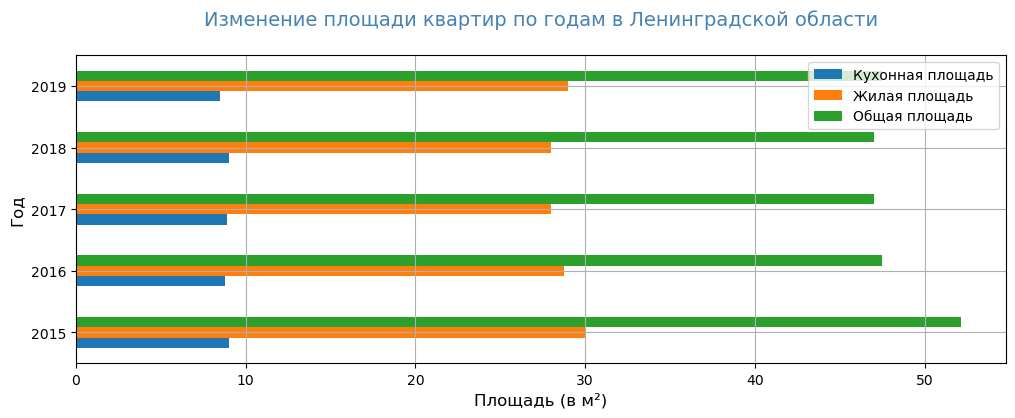

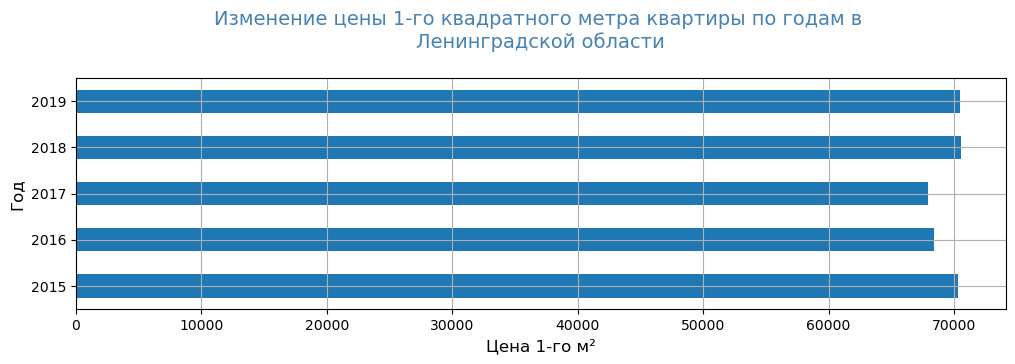

In [66]:
data_not_spb = (
    df[(df['locality_name'] != 'Санкт-Петербург') & (df['year_exposition'] != 2014)]
    .pivot_table(index='year_exposition', 
                 values=['total_area', 'living_area', 'kitchen_area', 'price_1_meter'], 
                 aggfunc='median')
)

ax = data_not_spb[['kitchen_area', 'living_area', 'total_area']].plot(kind='barh', figsize=(12,4), grid=True)
ax.set_title('Изменение площади квартир по годам в Ленинградской области\n', fontsize=14, color ='SteelBlue')
ax.set_xlabel('Площадь (в м²)', fontsize=12)
ax.set_ylabel('Год', fontsize=12)
plt.legend(['Кухонная площадь', 'Жилая площадь', 'Общая площадь'])
plt.show()

ax = data_not_spb['price_1_meter'].plot(kind='barh', figsize=(12,3), grid=True)
ax.set_title('Изменение цены 1-го квадратного метра квартиры по годам в \nЛенинградской области\n', 
             fontsize=14, color ='SteelBlue')
ax.set_xlabel('Цена 1-го м²', fontsize=12)
ax.set_ylabel('Год', fontsize=12);

По графику видно, что в Санкт-Петербурге с 2015 года наблюдается тенденция к уменьшению площади квартир. Общая площадь продаваемых квартир сокращалась вплоть до 2018 года, в 2019 году наблюдался небольшой рост, однако, поскольку данные за этот год неполные, нельзя утверждать, что этот рост действительно был, а не вызван просто неполнотой данных за этот год. В то же время стоимость 1-го квадратного метра квартиры, начиная с 2016 года, увеличивается, что говорит о росте цен на квартиры в Санкт-Петербурге в целом.

В Ленинградской области также наблюдался резкое сокращение площадь квартир в 2016 году, однако, после этого их площадь практически не менялась. Стоимость 1-го квадратного метра квартир в Ленинградской области практически не менялась в период с 2016 по 2019 год: наблюдалось небольшое снижение цен в 2016 и 2017 годах, однако, в 2018 году цена 1-го квадратного метра  вернулась к отметке 2015 года, равной примерно 70 тыс. рублей. Таким образом, цены на квартиры в Ленинградской области в период с 2015 по 2019 год практически не менялись.

Однако даже при наличии ежегодного роста цен на квартиры в Санкт-Петербурге нельзя говорить о том, что цена квартиры зависит именно от года, поскольку на неё влияют другие факторы, такие как, например, изменение параметров строящихся квартир, экономическая ситуация в стране, а это уже отражается в изменении цены по годам. 

#### 4.3.9. Вывод о зависимости цены от различных факторов

Таким образом, мы выяснили, что цена квартиры зависит от:
* общей площади и чуть меньше от её жилой и кухонной площадей;
* количества комнат: чем их больше, тем выше цена (для квартир с количеством комнат от 1 до 4);
* этажа, на котором находится квартира: квартиры на первом этаже стоят меньше, чем на остальных, а на последнем меньше, чем на средних.

Цена квартиры не зависит от:
* дня недели размещения объявления о её продаже;
* месяца размещения объявления.

Также было обнаружено, что начиная с 2016 года, цены на квартиры в Санкт-Петербурге с каждым годом растут, а в Ленинградской области с 2015 по 2019 год цены практически не менялись.

### 4.4. Цена одного квадратного метра в разных населённых пунктах

Посчитаем медианное значение цены одного квадратного метра в 10 населённых пунктах с наибольшим количеством объявлений о продаже квартир и построим соответствующий график. 

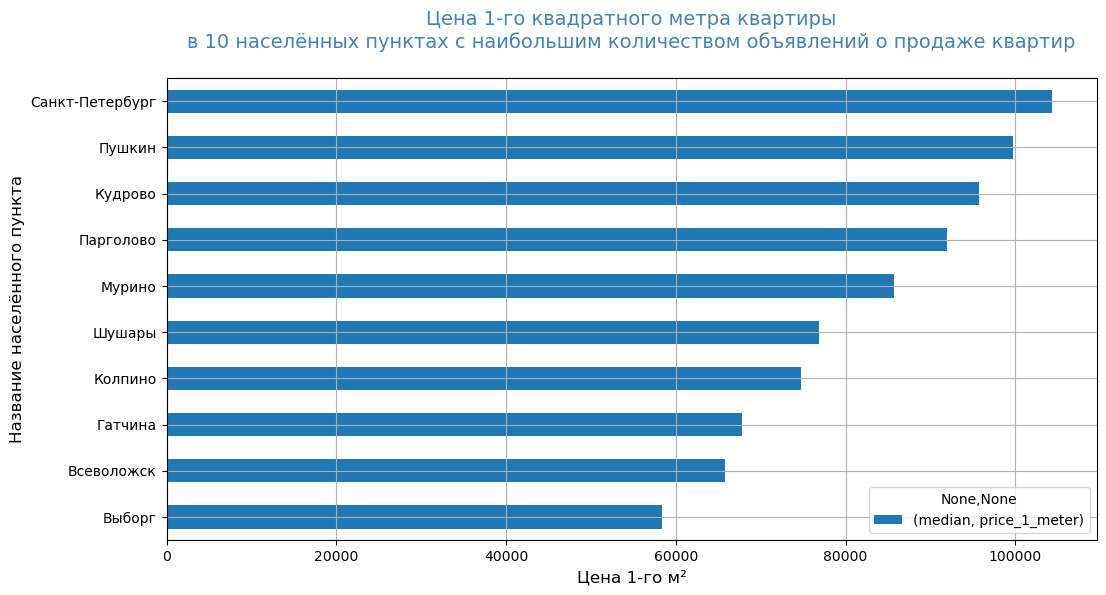

In [67]:
ax = (
    df
    .pivot_table(index='locality_name', values='price_1_meter', aggfunc=['count', 'median']) 
    .sort_values(by=('count', 'price_1_meter'), ascending=False) 
    .head(10) 
    .sort_values(by=('median', 'price_1_meter'), ascending=True)
    .plot(y=('median', 'price_1_meter'), kind='barh', figsize=(12, 6), grid=True)
)

ax.set_title('Цена 1-го квадратного метра квартиры\nв 10 населённых пунктах с наибольшим количеством объявлений ' + \
             'о продаже квартир\n', fontsize=14, color ='SteelBlue')
ax.set_xlabel('Цена 1-го м²', fontsize=12)
ax.set_ylabel('Название населённого пункта', fontsize=12);

Самая высокая стоимость одного квадратного метра, ожидаемо, в Санкт-Петербурге, а самая маленькая - в Выборге. Это может объясняться тем, что Выборг находится на большем расстоянии от Санкт-Петербурга, чем остальные населённые пункты.

### 4.5. Изменение стоимости квартир в зависимости от расстояния до центра Санкт-Петербурга

Выделим квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислим средню и медианную цену каждого километра. Вспомним, что значения в столбце `distance_city_center_km` уже округлены до целых чисел, причём в большую сторону. То есть, например, квартира, находящаяся на расстоянии 0.9 км, входит в диапазон 1 км от центра города, а квартира на расстоянии 1.1 км от центра уже находится во 2 км от центра.

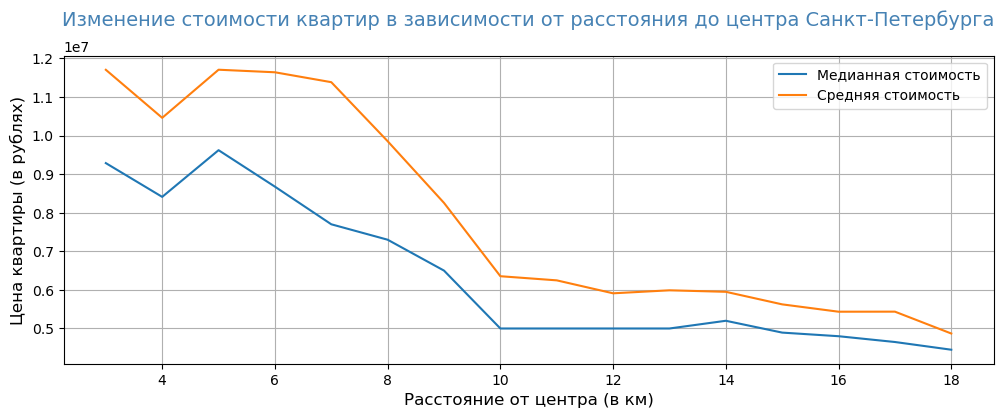

In [68]:
price_km = (
    df
    .query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='distance_city_center_km', values='last_price', aggfunc=['count', 'median', 'mean'])
)

ax = price_km[price_km[('count', 'last_price')] > 250].plot(y=[('median', 'last_price'), ('mean', 'last_price')], 
                                                      figsize=(12, 4), grid=True)

ax.set_title('Изменение стоимости квартир в зависимости от расстояния до центра Санкт-Петербурга\n', 
             fontsize=14, color ='SteelBlue')
ax.set_ylabel('Цена квартиры (в рублях)', fontsize=12)
ax.set_xlabel('Расстояние от центра (в км)', fontsize=12)
plt.legend(['Медианная стоимость', 'Средняя стоимость']);

В целом видна явная зависимость, что чем ближе к центру Санкт-Петербурга, тем дороже квартиры. Причём чем дальше от центра, тем медленнее падает цена на квартиры. 

Кроме того, заметим, что медианное и среднее значение ближе к центру отличаются друг от друга сильнее, чем при удалении от него. Это говорит о том, что ближе к центру больше квартир с аномально высокой стоимостью, то есть со стоимостью сильно отличающейся от стоимости аналогичных квартир на рынке.

На графике показана стоимость квартир не для всех километров от центра города, поскольку при небольшом объёме данных вычисляемые значения могут быть искажены, соответственно такие значения мы при построении графика не учитывали.

На 5-ом км наблюдается скачок на графике; чтобы понять, откуда он взялся, посмотрим на количество квартир разных категорий ("первый", "последний", "другой") и какую долю они занимают на каждом километре.

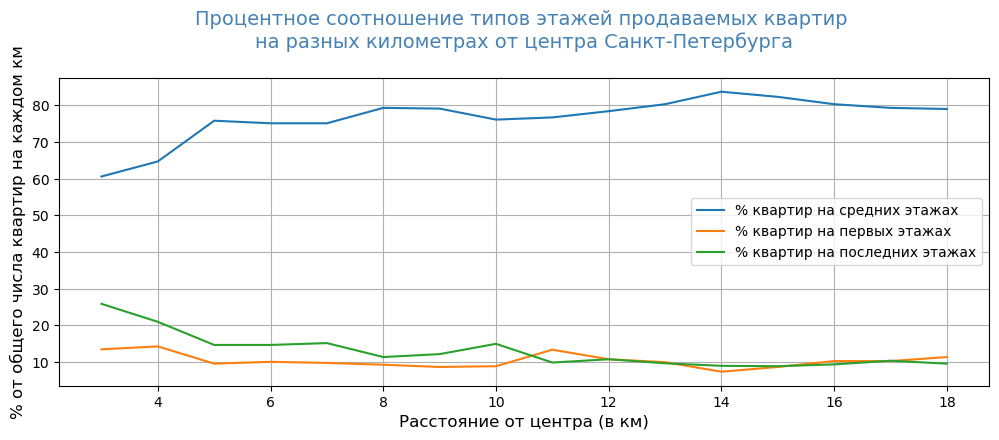

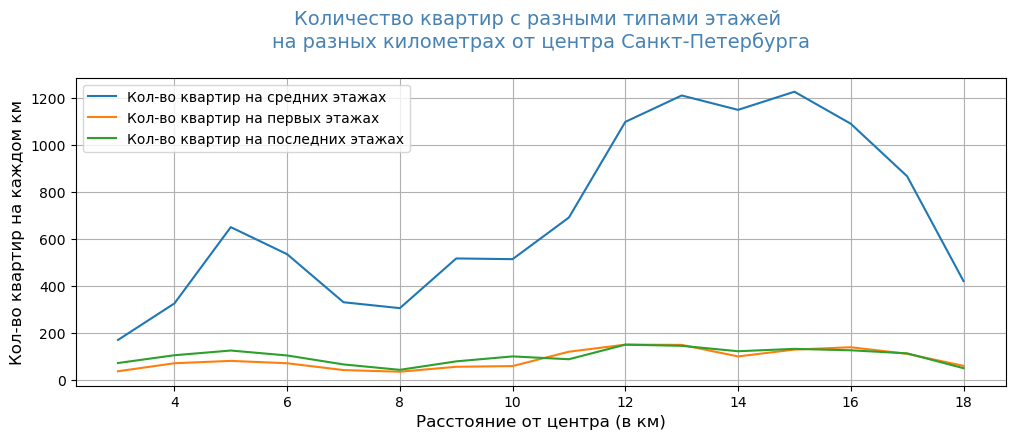

In [69]:
share_flats = (
    df
    .query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='distance_city_center_km', values='last_price', columns='type_flat_floor', aggfunc='count')
)
share_flats['count_overall'] = price_km['count']
share_flats['другой_доля'] = round(share_flats['другой'] / share_flats['count_overall'] * 100, 1)
share_flats['первый_доля'] = round(share_flats['первый'] / share_flats['count_overall'] * 100, 1)
share_flats['последний_доля'] = round(share_flats['последний'] / share_flats['count_overall'] * 100, 1)

ax = share_flats.query('count_overall > 250').plot(y=['другой_доля', 'первый_доля', 'последний_доля'], 
                                                   figsize=(12, 4), grid=True)
ax.set_title('Процентное соотношение типов этажей продаваемых квартир \nна разных километрах от центра Санкт-Петербурга\n', 
             fontsize=14, color ='SteelBlue')
ax.set_ylabel('% от общего числа квартир на каждом км', fontsize=12)
ax.set_xlabel('Расстояние от центра (в км)', fontsize=12)
plt.legend(['% квартир на средних этажах', '% квартир на первых этажах', '% квартир на последних этажах']);

ax = share_flats.query('count_overall > 250').plot(y=['другой', 'первый', 'последний'], 
                                                   figsize=(12, 4), grid=True)
ax.set_title('Количество квартир с разными типами этажей \nна разных километрах от центра Санкт-Петербурга\n', 
             fontsize=14, color ='SteelBlue')
ax.set_ylabel('Кол-во квартир на каждом км', fontsize=12)
ax.set_xlabel('Расстояние от центра (в км)', fontsize=12)
plt.legend(['Кол-во квартир на средних этажах', 'Кол-во квартир на первых этажах', 'Кол-во квартир на последних этажах']);

На графике, где показаны доли квартир разных категорий по каждому километру, резких скачков не наблюдается; на 5-ом км доля квартир, находящихся на средних этажах немного увеличилась, а на первом и на последнем - уменьшилась. Однако мы видим скачок на 5-ом км на графике, где отображено количество квартир разных категорий. Это значит следующее: хоть в процентном соотношении в категории квартир в районе 5-го км не происходит сильных изменений, однако, там наблюдается резкое увеличение числа квартир, находящихся на средних этажах. Помним, что квартиры на средних этажах стоят дороже, чем на первом и на последнем, этим и вызвано резкое увеличение стоимости квартир на 5-ом километре.

Скачок на 2-ом графике, который мы наблюдаем начиная с 10 км, вероятнее всего вызван тем, что на окраинах Санкт-Петербурга много высотных жилых домов, отсюда и рост количества квартир на средних этажах; а за городом их количество сокращается, поэтому мы видим резкий спад в конце графика.

## 5. Выводы

**1. Время продажи квартир.**
* Медианное время продажи квартир - 95 дней. Быстрой продажей можно считать продажу, которая происходит за время до 45 дней; таких продаж 25%. К чересчур долгим продажам относятся те, которые происходят за более чем 230 дней; такие продажи также составляют 25%.
* Длительность продажи квартир в период с 2014 по 2019 год с каждым годом сокращалась, причём как минимум на 35% по сравнению с предыдущим годом. То есть с каждым годом квартиры продаются всё быстрее и быстрее.
* Возможно, на скорость продажи квартир (длительность размещения объявления о продаже) влияет срок бесплатного размещения объявлений на сайте Яндекс.Недвижимость. Однако данные предоставлены за период с 2014 по 2019 год, а условия для бесплатного размещения объявлений актуальны на момент 2023 года. Соответственно за прошедшие 4 года условия могли измениться, поэтому и требуется более тщательное изучение этого вопроса.

**2. Зависимость цены квартиры от различных факторов.**
* Цена квартиры тем больше, чем больше площадь. Причём учитываются разные показатели площади: общая площадь квартиры, жилая площадь, площадь кухни. От общей площади цена зависит больше, чем от жилой и кухонной, а от кухонной меньше, чем от предыдущих показателей. 
* Чем больше комнат, тем выше цена квартиры; это прослеживается для квартир с количеством комнат от 1 до 4. Квартир с количеством комнат равным 0 или больше 4 в данных недостаточно для анализа.
* Дороже всего стоят квартиры на средних этажах, затем по стоимости идут квартиры на последнем этаже, а после - на первом.
* Цена квартиры не зависит от дня недели, когда было размещено объявление о продаже, и от месяца его размещения.
* Стоимость 1-го квадратного метра квартиры в Санкт-Петербурге, начиная с 2016 года, увеличивалась с каждым годом, что говорит о росте цен на квартиры в Санкт-Петербурге в целом. В Ленинградской области в период с 2015 по 2019 год стоимость 1-го квадратного метра практически не менялась, то есть цены на квартиры в целом в этот период также практически не изменялись. Однако даже при наличии ежегодного роста цен на квартиры в Санкт-Петербурге нельзя говорить о том, что цена квартиры зависит именно от года, поскольку на неё влияют другие факторы, такие как, например, изменение параметров строящихся квартир, экономическая ситуация в стране, а это уже отражается в изменении цены по годам. Данных о продажах квартир за 2014 год недостаточно для анализа.

**3. Стоимость 1-го квадратного метра в разных населённых пунктах.** Среди 10 населённых пунктов с наибольшим количеством объявлений о продаже квартир самая высокая стоимость 1-го квадратного метра в Санкт-Петербурге, а наиболее низкая - в Выборге. Это может объясняться тем, что Выборг находится от Санкт-Петербурга на большем расстоянии, чем остальные населённые пункты, которые расположены в пригороде Санкт-Петербурга. 

**4. Зависимость цены квартиры в Санкт-Петербурге от расстояния до центра города.** При анализе использовались данные о продажах квартир, находящихся на расстоянии от 3 до 18 км от центра города; для других расстояний данных для анализа недостаточно.
* Чем ближе к центру Санкт-Петербурга, тем дороже квартиры. 
* Чем дальше от центра, тем медленнее падает цена на квартиры.
* Чем ближе к центру тем больше квартир с аномально высокой стоимостью, то есть со стоимостью сильно отличающейся от стоимости аналогичных квартир.
* Обнаружено, что на 5-ом км от центра города, наблюдается резкое увеличение количества квартир на средних этажах. А поскольку такие квартиры дороже, чем квартиры на первом или последнем этажах, то на 5-ом километре от центра Санкт-Петербурга наблюдается резкий скачок медианной цены квартир.
